# Introduction to Data Science and Systems 
# 2023-2024

## Lecture Week 2: Introduction, Vectors and Matrices (and a bit of `numpy`)


 ##### University of Glasgow - material prepared by John H. Williamson (adapted to IDSS by BSJ, ZM and NP), <small>v20232024a</small>
 
---- 
 $$\newcommand{\vec}[1]{{\bf #1}} 
 \newenvironment{examinable}{}{{}}
\newcommand{\real}{\mathbb{R}}
\newcommand{\expect}[1]{\mathbb{E}[#1]}
\DeclareMathOperator*{\argmin}{arg\,min}
%\vec{x}
%\real
$$

## Summary
By the end of this unit you should know:
* what a vector is and what a vector space is
* the standard operations on vectors: addition and multiplication
* what a norm is and how it can be used to measure vectors
* what an inner product is and how it gives rise to geometry of vectors
* how mathematical vectors map onto numerical arrays
* the different p-norms and their uses
* important computational uses of vector representations
* how to characterise vector data with a mean vector and a covariance matrix
* the properties of high-dimensional vector spaces
* the basic notation for matrices
* the view of matrices as linear maps
* how basic geometric transforms are implemented using matrices
* how matrix multiplication is defined and its algebraic properties
* the basic anatomy of matrices 

In [1]:
# standard imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from jhwutils.matrices import show_matrix_effect, print_matrix
plt.rc('figure', figsize=(6.0, 5.0), dpi=240)

# Example: Text  and translation
Text, as represented by strings in memory, has *weak structure*. There are **comparison functions** for strings (e.g. edit distance, Hamming distance) but the distance between two strings captures only character-level semantics. **String operations** are character-level operations like concatenation or reversal. These string operations are fine for building spell-checkers, but they aren't much use for building a machine translation system.


<img src="imgs/dictionary.jpg"> 
<br><br>*[[Image](https://flickr.com/photos/horiavarlan/4268897748 "Spanish dictionary pages up into the air") by [Horia Varlan](https://flickr.com/people/horiavarlan) shared [CC BY](https://creativecommons.org/licenses/by/2.0/)]*


## Words aren't enough
Looking up words in the dictionary doesn't work as translation model, no matter how brilliant your text comparison algorithms are:

* *Original*

>    "The craft held fast to the bank of the burn."
>
>    *(the vessel stayed moored to the edge of the stream)*
    
*  *Dictionary lookup (naiive)*

> French:
>    "L'artisanat tenu rapide à la Banque de la brûlure." 
>
>    *(the artisanal skill held quickly to the financial institution of the burn wounds)*
>
> Danish:
>    "Håndværket holdt fast til banken af brænden"  
>
>    *(The craftmanship held fast to the bank [financial institution] of fire)*
   
* *Correct(ish)*

> French:
>    "Le bateau se tenait fermement à la rive du ruisseau." 
>
>    *(the boat was firmly attached to the riverbank)*
> 
> Danish:
>    "Farttøjet holdt fast i bredden af åen" 
>
>    *(The vessel held fast at the bank of the river)*


An effective approach is to imbue text fragments with additional mathematical structure -- **to place them in a vector space**. Fragments might be words, partial words or whole sentences. This is called **embedding** and algorithms such as [Word2vec](https://en.wikipedia.org/wiki/Word2vec) can learn a transformation from strings to high dimensional vectors (typically >100D) simply by observing large amounts of text.
<img src="imgs/word2vec.png">
*[Image: word2vec example, from https://www.tensorflow.org/tutorials/word2vec, licensed Apache 2.0]*

Because this data has the structure of a (topological) vector space, it is possible answer computationally questions like:
* what words are like `salamander`? (i.e. which vectors are in the neighbourhood of the vector corresponding to `salamander`), which might include words like `axolotl` or `waterdog`.
* What is the equivalent of a `king`, but with a `woman` instead of a `man`? Famously, the original word2vec paper should that on their test data, the equation 
$$\text{King} - \text{Man} + \text{Woman} = \text{Queen}$$ held, where addition is defined as vector addition.

Although each dimension of the space has no obvious meaning, the embedding means that **semantics are mapped onto spatial relations**.

---

# Vector spaces
In this course, we will consider vectors to be ordered tuples of real numbers $[x_1, x_2, \dots x_n], x_i \in \mathbb{R}$ (the concept generalises to complex numbers, finite fields, etc. but we'll ignore that). A vector has a fixed dimension $n$, which is the length of the tuple. We can imagine each element of the vector as representing a distance in an **direction orthogonal** to all the other elements.

For example, a length-3 vector might be used to represent a spatial position in Cartesian coordinates, with three orthogonal measurements for each vector. Orthogonal just means "independent", or, geometrically speaking "at 90 degrees".


* Consider the 3D vector [5, 7, 3]. This is a point in $\real^3$, which is formed of:

            5 * [1,0,0] +
            7 * [0,1,0] +
            3 * [0,0,1]
            
Each of these vectors [1,0,0], [0,1,0], [0,0,1] is pointing in a independent direction (orthogonal direction) and has length one. The vector [5,7,3]
can be thought of a weighted sum of these orthogonal unit vectors (called **"basis vectors"**). The vector space has three independent bases, and so is three dimensional.

We write vectors with a bold lower case letter:
$$\vec{x} = [x_1, x_2, \dots, x_d],\\
\vec{y} = [y_1, y_2, \dots, y_d],$$ and so on.

## Points in space

### Notation: $\real^n$

* $\real$ means the set of real numbers.  
* $\real_{\geq 0}$ means the set of non-negative reals.  
* $\real^n$ means the set of tuples of exactly $n$ real numbers (vector). 
* $\real^{n\times m}$ means the set of 2D arrays (matrix) of real numbers with exactly $n$ rows of $m$ elements.

* The notation $(\real^n, \real^n) \rightarrow \real$ says that the operation defines a map from a pair of $n$ dimensional vectors to a real number.

### Vector spaces
Any vector of given dimension $n$ lies in a **vector space**, called $\real^n$ (we will only deal with finite-dimensional real vector spaces with standard bases), which is the set of possible vectors of length $n$ having real elements, along with the operations of: 
*  **scalar multiplication** so that $a{\bf x}$  is defined for any scalar $a$. For real vectors, $a{\bf x} = [a x_1, a x_2, \dots a x_n]$, elementwise scaling.
    * $(\real, \real^n) \rightarrow \real^n$
* **vector addition** so that ${\bf x} + {\bf y}$ vectors ${\bf x, y}$ of equal dimension. For real vectors, ${\bf x} + {\bf y} = [x_1 + y_1, x_2 + y_2, \dots x_d + y_d]$ the elementwise sum
    * $(\real^n, \real^n) \rightarrow \real^n$


We will consider vector spaces which are equipped with two additional operations:
* a **norm** $||{\bf x}||$ which allows the length of vectors to be measured.
    * $\real_n \rightarrow \real_{\geq 0}$
* an **inner product** $\langle {\bf x} | {\bf y} \rangle$ or ${\bf x \bullet y}$  which allows the angles of two vectors to be compared. The inner product of two orthogonal vectors is 0. For real vectors ${\bf x}\bullet{\bf y} = x_1 y_1 + x_2 y_2 + x_3 y_3 \dots x_d y_d$
    * $(\real^n, \real^n) \rightarrow \real$

All operations between vectors are defined within a vector space. We cannot, for example, add two vectors of different dimension, as they are elements of different spaces.

#### Topological and inner product spaces
With a norm a vector space is a **normed vector space**. This means that the space is continuous, and it makes sense to talk about vectors being "close together" or a vector having a neighbourhood around it. With an inner product, a vector space is an **inner product space**, and we can talk about the angle between two vectors.

<img src="imgs/vectors.png" width="60%">

### Are vectors points in space, arrows pointing from the origin, or tuples of numbers?
These are all valid ways of thinking about vectors. Most high school mathematics uses the "arrows" view of vectors. Computationally, the tuple of numbers is the *representation* we use. The "points in space" mental model is probably the most useful, but some operations are easier to understand from the alternative perspectives. 

The points mental model is the most useful *because* we tend to view:
* vectors to represent *data*; data lies in space
* matrices to represent *operations* on data; matrices warp space.


### Relation to arrays
These vectors of real numbers can be represented by the 1D floating point arrays we called "vectors" in the self-study. But be careful; the representation and the mathematical element are different things, just as floating point numbers are not real numbers.

In [2]:
# two 3D vectors (3 element ordered tuples)
x = np.array([0,1,1])
y = np.array([4,5,6])
a = 2
print_matrix("a", a)
print_matrix("x", x)
print_matrix("y", y)

<IPython.core.display.Latex object>

x 
 [[0 1 1]]
y 
 [[4 5 6]]


In [3]:
print_matrix("ax", a*x) 
print_matrix("ay", a*y) 
print_matrix("x+y", x+y) 
print_matrix("\|x\|_2", np.linalg.norm(x)) # norm
print_matrix("x\cdot y", np.dot(x,y))      # inner product

ax 
 [[0 2 2]]
ay 
 [[ 8 10 12]]
x+y 
 [[4 6 7]]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

---

## Uses of vectors
Vectors, despite their apparently simple nature, are enormously important throughout data science. They are a *lingua franca* for data. Because vectors can be 
* **composed** (via addition), 
* **compared** (via norms/inner products) 
* and **weighted** (by scaling), 

they can represent many of the kinds of transformations we want to be able to do to data.

On top of this, they map onto the efficient **ndarray** data structure, so we can operate on them efficiently and concisely.


### Vector data
Datasets are commonly stored as 2D **tables**. These can be seen as lists of vectors. Each **row** is a vector representing an "observation" (e.g. the fluid flow reading in 10 pipes might become a 10 element vector). Each observation is then stacked up in a 2D matrix. Each **column** represents one element of the vector across many observations.

We have seen many datasets like this (synthetic) physiological dataset:

    heart_rate systolic diastolic vo2 
     67           110    72       98
     65           111    70       98
     64           110    69       97
     ..
     
Each **row** can be seen as a vector in $\real^n$ (in $\real^4$ for this set of physiological measurements). The whole matrix is a sequence of vectors in the same vector space. This means we can make **geometric** statements about tabular data.

    


### Geometric operations
The most obvious use of vectors is to represent 2D or 3D geometric data. Almost all the computation in a modern computer game or 3D rendering engine is made up of low dimensional vector operations (2D, 3D, or 4D) repeated at enormous scale. 
    

<img src="imgs/spaceship.png">

*Image: geometry made up of faces (*blue*), defined by edges (*white*) which connect together vertices (*reddish*). Vertices are points, or rather vectors in a vector space. The whole model can be moved and rotated by applying an identical operation to each vertex.*

The *Cobra Mk. III* spaceship model above is defined by these vectors specifying the vertices in 3D space:

         [[ -0.   15.    0. ]
         [ 16.   -0.5  32.5]
         [-16.   -0.5  32.5]
         [ 16.  -15.  -32.5]
         [-16.  -15.  -32.5]
         [-44.   10.  -32.5]
         [-60.   -3.  -13. ]
         [-65.   -3.  -32.5]
         [ 44.   10.  -32.5]
         [ 60.   -3.  -13. ]
         [ 65.   -3.  -32.5]
         [ -0.   15.  -32.5]]

---

Standard transformations in 3D space include:

* scaling
* rotation
* flipping (mirroring)
* translation (shifting)

as well as more specialised operations like color space transforms or estimating the surface normals of a triangle mesh (which way the triangles are pointing). 

GPUs evolved from devices designed to do these geometric transformations extremely quickly. A vector space formulation lets all geometry have a common representation, and *matrices* (which we will see later) allow for efficient definition of operations on portions of that geometry.

Graphical pipelines process everything (spatial position, surface normal direction, texture coordinates, colours, and so on) as large arrays of vectors. Programming for graphics on GPUs largely involves packing data into a low-dimensional vector arrays (on the CPU) then processing them quickly on the GPU using a **shader language**.

Shader languages like HLSL and GLSL have special data types and operators for working with low dimensional vectors:

    # some GLSL
    vec3 pos = vec3(1.0,2.0,0.0);
    vec3 vel = vec3(0.1,0.0,0.0);
    
    pos = pos + vel;

### Machine learning applications
Machine learning relies heavily on vector representation. A typical machine learning process involves:

* transforming some data onto **feature vectors** 
* creating a function that transforms **feature vectors** to a prediction (e.g. a class label)

The **feature vectors** are simply an encoding of the data in vector space, which could be as simple as the tabular data example above, and feature transforms (the operations that take data in its "raw" form and output feature vectors) range from the very simple to enormously sophisticated. 

*Most machine learning algorithms can be seen as doing geometric operations: comparing distances, warping space, computing angles, and so on.*

One of the simplest effective machine learning algorithms is **k nearest neighbours**. This involves some *training set* of data, which consists of pairs $\vec{x_i}, y_i$: a feature vector $\vec{x_i}$ and a label $y_i$. 

When a new feature needs classified to make a prediction, the $k$ *nearest* vectors in this training set are computed, using a **norm** to compute distances. The output prediction is the class label that occurs most times among these $k$ neighbours ($k$ is preset in some way; for many problems it might be around 3-12).

The idea is simple; nearby vectors ought to share common properties. So to find a property we don't know for a vector we do know, look at the properties that nearby vectors have.

<img src="imgs/iris.png">
*[Image: the measurements of the dimensions of the sepals and petals of irises allows classification of species]*

In a classic ML example, the feature vector is the physical dimensions of the parts of a flower; four measurements like above gives a 4D vector. The class to predict is the *species* of the flower. 

<img src="imgs/knn.png" width="70%">

*Image: pairplot of the four dimensions of the iris dataset against each other. A new point (yellow) is tested, and the 3 nearest neighbours (black dashed circles) are shown. The result of classification is the majority label of the neighbours; here, most of the neighbours belong to the green class*

<img src="imgs/knn_2.png" width="45%">

However, when using a setting of 7 nearest neighours, most of the neighbours belong to the red class*

[Original images are from [here](https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn).]

### Image compression
Images have a straightforward representation as 2D arrays of brightness, as we have seen already. But, just like text, this representation is rather empty in terms of the operations that can be done to it. A single pixel, on its own, has as little meaning as a single letter.

Groups of pixels -- for example, rectangular patches -- can be unraveled into a vector. An 8x8 image patch would be unraveled to a 64-dimensional vector. These vectors can be treated as elements of a vector space.

<img src="imgs/img_closeup.png"> <br>
<img src="imgs/img_vector.png"> <br>
<br><br>*.[Original image](https://flickr.com/photos/fsadykov/28389929340 "homeless") by [red line highway](https://flickr.com/people/fsadykov) [CC BY](https://creativecommons.org/licenses/by/2.0/)*

Many image compression algorithms take advantage of this view. One common approach involves splitting images into patches, and treating each patch as a vector $\vec{x_1}, \dots, \vec{x_n}$. The vectors are **clustered** to find a small number of vectors $\vec{y_1}, \dots, \vec{y_m},\ m << n$ that are a reasonable approximation of nearby vectors. Instead of storing the whole image, the vectors for the small number of representative vectors $\vec{y_i}$ are stored (the **codebook**), and the rest of the image is represented as the *indices* of the "closest" matching vector in the codebook (i.e. the vector $\vec{y_j}$ that minimises $||x_i - y_j||$. 

This is **vector quantisation**, so called because it quantises the vector space into a small number of discrete regions. This process maps **visual similarity onto spatial relationships.**


---

## Basic vector operations
There are several standard operations defined for vectors, including getting the length of vectors,  and computing dot (inner), outer and cross products.
<br>

### Addition and multiplication
Elementwise addition and scalar multiplication on arrays already implement the mathematical vector operations. Note that these ideas let us form **weighted sums** of vectors:
$$\lambda_1 \vec{x_1} + \lambda_2 \vec{x_2} + \dots + \lambda_n \vec {x_n}$$

This applies **only** to vectors of the same dimension. 

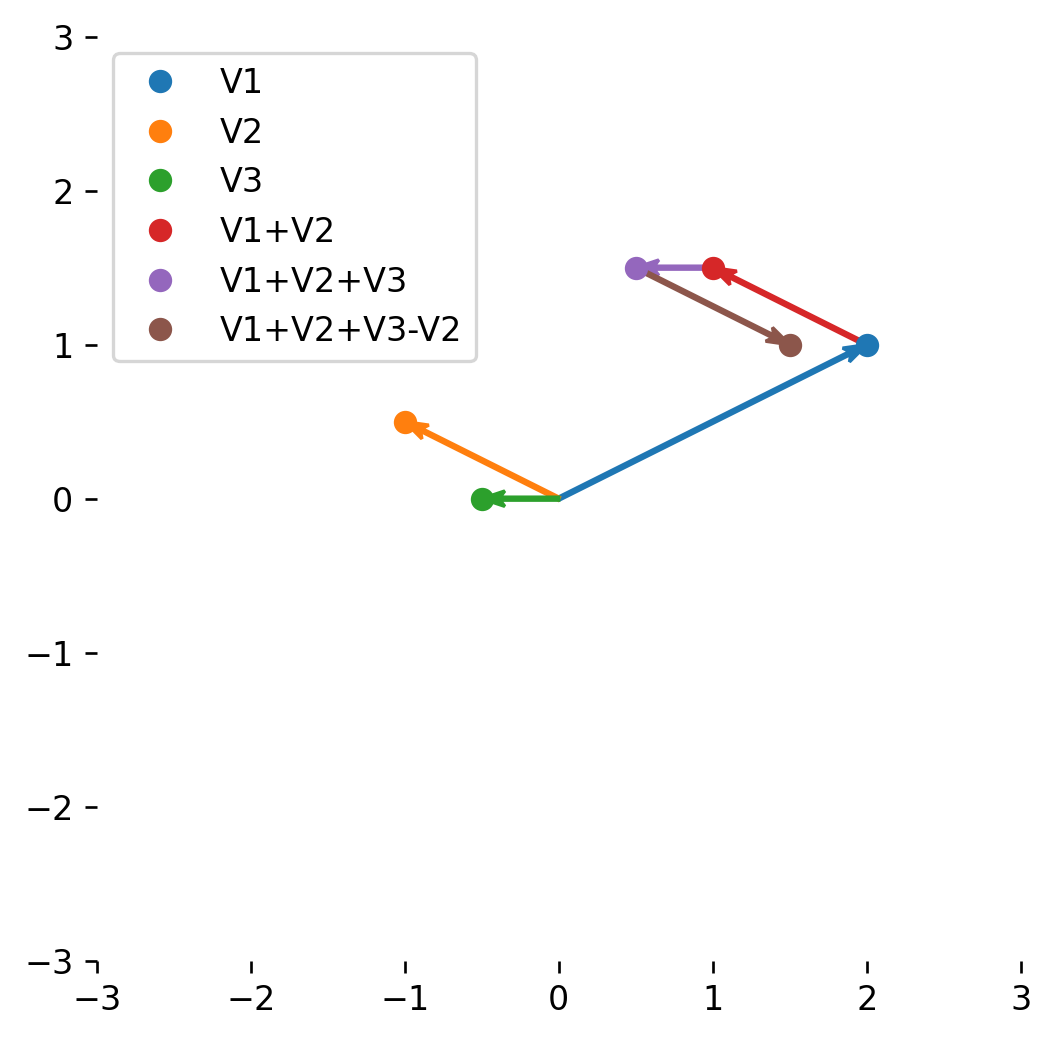

In [4]:
v1 = np.array([2.0, 1.0])
v2 = np.array([-1.0, 0.5])
v3 = np.array([-0.5, 0.0])

origin = np.array([0,0])

def show_vector(ax, start, end, label='', color=None, **kwargs):
    vec = np.stack([start, end])    
    lines = ax.plot(end[0], end[1], 'o', label=label, color=color, **kwargs)
    if color is None:
        color = lines[0].get_color()
    ax.arrow(start[0], start[1], end[0]-start[0], end[1]-start[1], 
             head_width=0.1, width=0.02, overhang=0.2, length_includes_head=True,
            color=color, **kwargs)
    

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# show the original vectors
show_vector(ax, origin, v1, 'V1')
show_vector(ax, origin, v2, 'V2')
show_vector(ax, origin, v3, 'V3')
# show some sums of vectors
show_vector(ax, v1, v1+v2, 'V1+V2')
show_vector(ax, v1+v2, v1+v2+v3, 'V1+V2+V3')
show_vector(ax, v1+v2+v3, v1+v2+v3-v2, 'V1+V2+V3-V2')

ax.set_frame_on(False)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect(1.0)
ax.legend()

Note that because we have defined addition and scalar multiplication, many standard statistics and operations can be directly applied.

For example, we can **linearly interpolate** between two vectors. Linear interpolation of two values is governed by a parameter $\alpha$, and is just:

$$\text{lerp}(\vec{x}, \vec{y}, \alpha) = (1-\alpha) \vec{x} + (\alpha) \vec{y}$$

This lets us move along the line between two vectors: as $\alpha$ goes from 0 to 1, the result goes in a smooth straight line from $\vec{x}$ to $\vec{y}$.

We can see this visually:


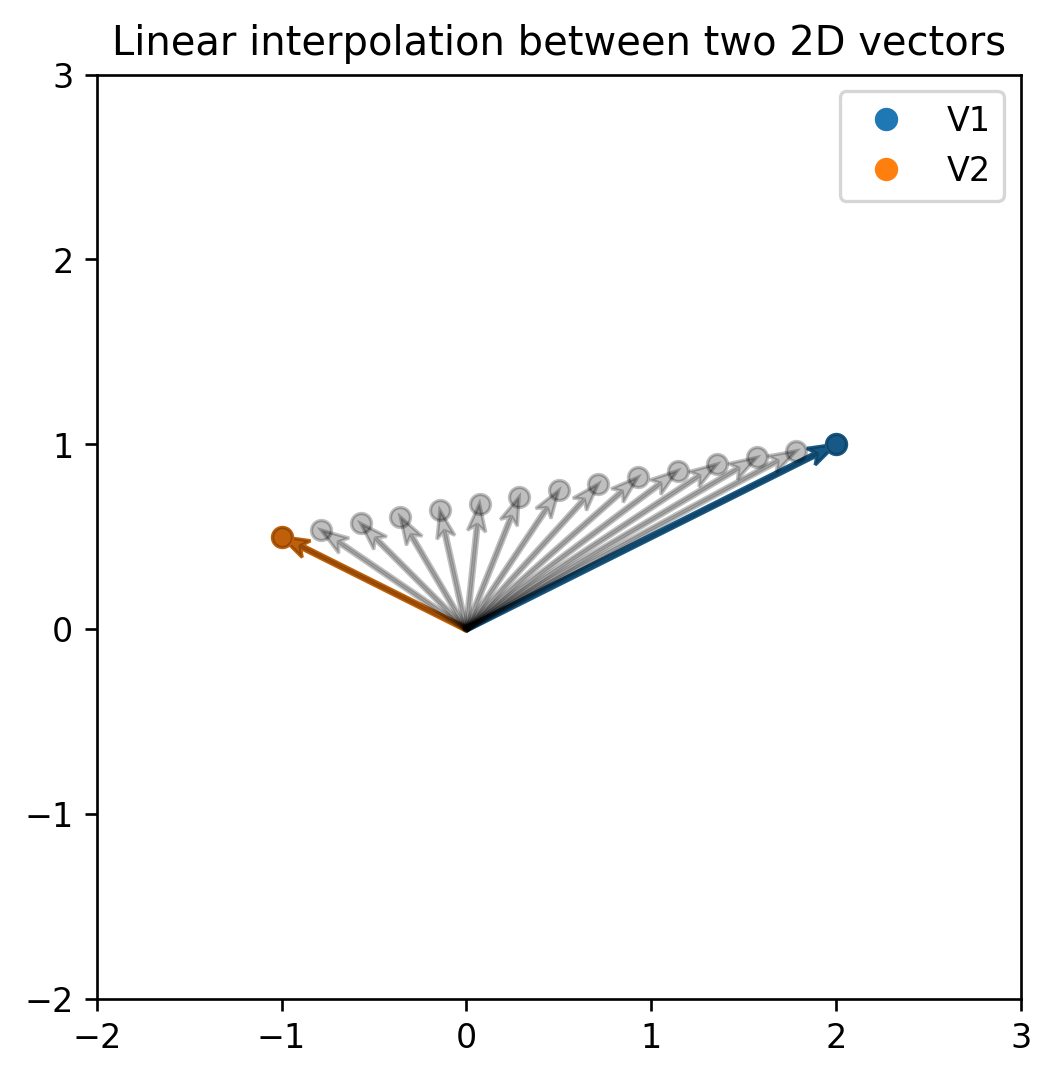

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# show the original vectors
show_vector(ax, origin, v1, 'V1')
show_vector(ax, origin, v2, 'V2')


# show a range of weighted vectors in between
alphas = np.linspace(0, 1, 15)
for alpha in alphas:
    show_vector(ax, origin, 
                alpha * v1 + (1 - alpha) * v2, color='k', alpha=0.25, label='')
    
ax.set_xlim(-2, 3)
ax.set_ylim(-2, 3)
ax.set_title("Linear interpolation between two 2D vectors")
ax.legend()
ax.set_aspect(1.0)

## How big is that vector?
Vector spaces do not necessarily have a concept of distance, but the spaces we will consider can have a distance *defined*. It is not an inherent property of the space, but something that we define such that it gives us useful measures.

The Euclidean length of a vector $\bf x$ (written as $||{\bf x}||$) can be computed directly using `np.linalg.norm()`. This is equal to:

$$ \|{\bf x}\|_2 = \sqrt{x_0^2 + x_1^2 + x_2^2 + \dots + x_n^2  } $$

and corresponds to the radius of a (hyper)sphere that would just touch the position specified by the vector.

In [6]:
x = np.array([1.0, 10.0, -5.0])
y = np.array([1.0, -4.0, 8.0])
print_matrix("x", x)
print_matrix("y", y)

print_matrix("\|x\|", np.linalg.norm(x))
print_matrix("\|y\|", np.linalg.norm(y))


x 
 [[ 1. 10. -5.]]
y 
 [[ 1. -4.  8.]]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Different norms
The default `norm` is the **Euclidean norm** or **Euclidean distance measure**; this corresponds to the everyday meaning of the word "length". A vector space of real vectors with the Euclidean norm is called a **Euclidean space**. The distance between two vectors is just the norm of the difference of two vectors: $$||{\bf x-y}||_2$$ is the distance from $\bf x$ to $\bf y$

But there are multiple ways of measuring the length of a vector, some of which are more appropriate in certain contexts. These include the $L_p$-norms or Minkowski norms, which generalise Euclidean distances, written $$
\|{\bf x}\|_p$$.

The $L_p$ norm is defined by: 
    
$$\|\vec{x}\|_p = \left(\sum_i x_i^p\right)^\frac{1}{p}$$


<img src="imgs/pnorm_triangle.png" width="50%">

| p         | Notation              | Common name                    | Effect                 | Uses                                          | Geometric view                     |
|-----------|-----------------------|--------------------------------|------------------------|-----------------------------------------------|------------------------------------|
| 2         | $\|x\|$ or $\|x\|_2$  | Euclidean norm                 | Ordinary distance      | Spatial distance measurement                  | Sphere just touching point         |
| 1         | $\|x\|_1$             | Taxicab norm; Manhattan norm   | Sum of absolute values | Distances in high dimensions, or on grids     | Axis-aligned steps to get to point |
| 0         | $\|x\|_0$             | Zero pseudo-norm; non-zero sum | Count of non-zero values | Counting the number of "active elements"    | Numbers of dimensions not touching axes                                |
| $\infty$  | $\|x\|_\inf$          | Infinity norm; max norm        | Maximum element        | Capturing maximum "activation" or "excursion" | Smallest cube enclosing point      |
| $-\infty$ | $\|x\|_{-\inf}$       | Min norm                       | Minimum element        |    Capturing minimum excursion                                           |                         Distance of point to closest axis           |  

#### Unit "spheres"
The figure below shows the contours of a "sphere" in $\real^2$ in several $L_p$ norms; a series of rings with increasing size as measured by a $L_p$ norm over a 2D space. Every dashed line has the same distance to the origin as measured in that norm. The points of equal distance in that norm appear as a connected line.

<img src="imgs/pnorms.png">

*Image: isocontours of the $L_p$ norm for various $p$. This shows contours of equal distance to the centre for each norm. The top row shows standard norms. The bottom row shows pseudo-norms.*

In [14]:
test_vector = np.array([1, 0, 2, 0.1, -4, 0])
print_matrix("x", test_vector)
for norm in [1, 2, np.inf, -np.inf, 0, 0.5, 3, -1]:
    print_matrix("\|x\|_{{{norm}}}".format(norm=norm), np.linalg.norm(test_vector,norm))

x 
 [[ 1.   0.   2.   0.1 -4.   0. ]]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Unit vectors and normalisation
A unit vector has norm 1 (the definition of a unit vector depends on the norm used). Normalising for the Euclidean norm can be done by scaling the vector ${\bf x}$ by $\frac{1}{||{\bf x}||_2}$. A unit vector nearly always refers to a vector with Euclidean norm 1.

If we think of vectors in the physics sense of having a **direction** and **length**, a unit vector is "pure direction". If normalised using the $L_2$ norm, for example, a unit vector always lies on the surface of the unit sphere.

In [8]:
x = np.random.normal(0,5,(5,)) # a random vector
x_norm = x / np.linalg.norm(x) # a random unit vector
print_matrix("x", x)
print_matrix("x_n", x_norm)

x 
 [[ 4.64  1.67 -1.37 -2.45 -3.74]]
x_n 
 [[ 0.68  0.25 -0.2  -0.36 -0.55]]


In [9]:
def connect_plot(ax, a, b):
    
    for a1,b1 in zip(a,b):        
        #ax.plot([a1[0], b1[0]],[a1[1], b1[1]], 'k-', lw=0.25)
        ax.arrow(a1[0], a1[1], b1[0]-a1[0], b1[1]-a1[1],
              head_width=0.05, length_includes_head=True, facecolor='k', zorder=10)
        
        

Text(0.5, 1.0, 'Euclidean normalisation of vectors')

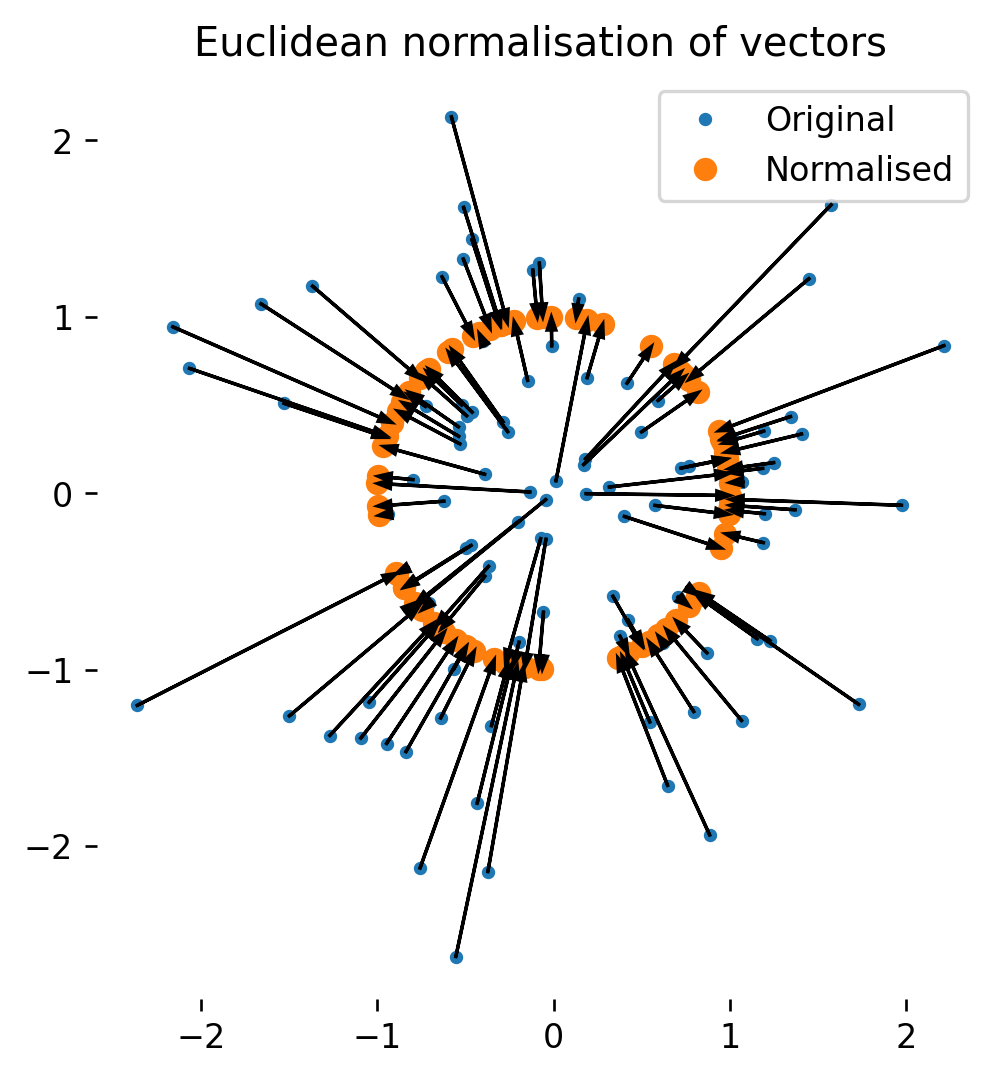

In [10]:
# show that 2D unit vectors lie on the unit circle
x = np.random.normal(0,1,(100,2)) # 100 2D vectors
unit_x = (x.T / np.linalg.norm(x, axis=1)).T # a random unit vector


# plot the results
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x[:,0], x[:,1], '.', label="Original")
ax.plot(unit_x[:,0], unit_x[:,1], 'o', label="Normalised")
ax.legend()
connect_plot(ax, x, unit_x)
ax.set_aspect(1.0)
ax.set_frame_on(False)
ax.set_title("Euclidean normalisation of vectors")

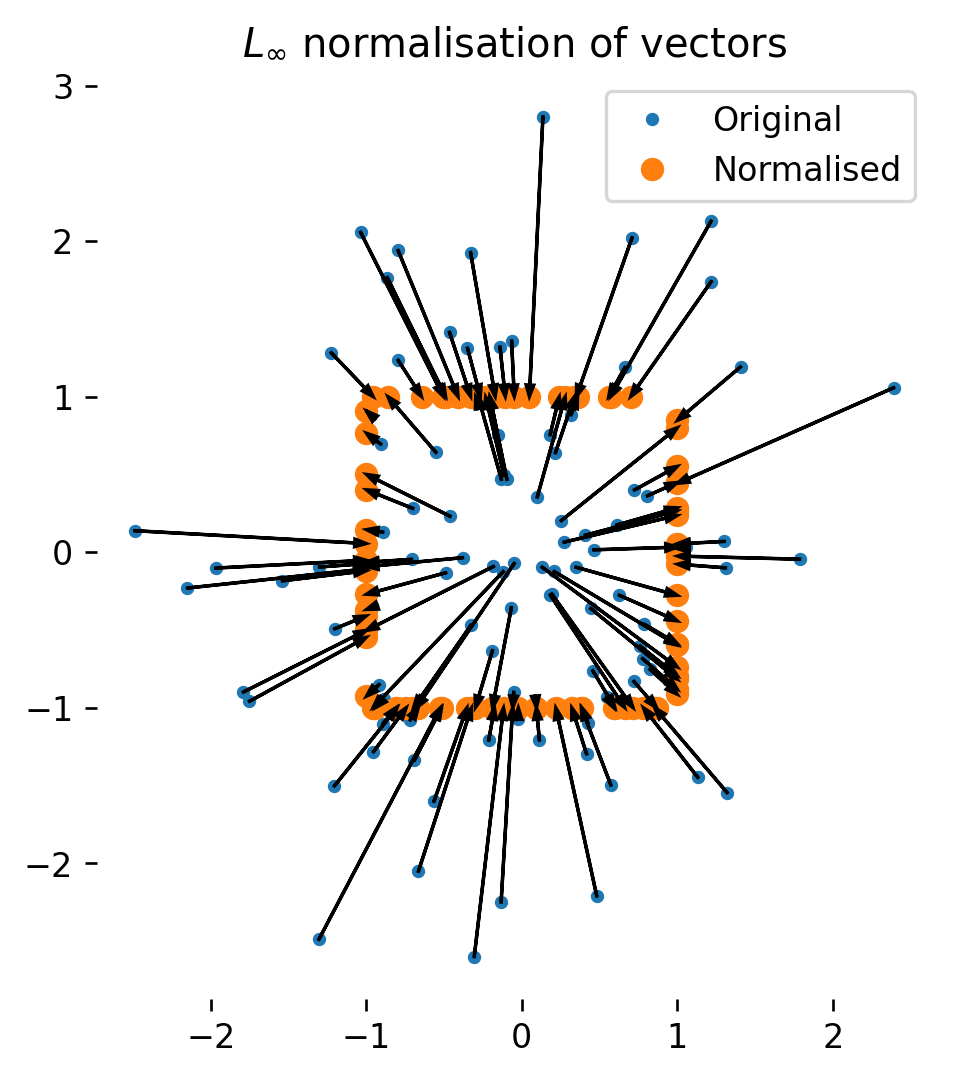

In [11]:
# in a different norm
x = np.random.normal(0,1,(100,2)) # 100 2D vectors
unit_x = (x.T / np.linalg.norm(x, axis=1, ord=np.inf)).T # a random L_inf unit vector

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

connect_plot(ax, x, unit_x)
ax.set_title("$L_\infty$ normalisation of vectors")
ax.plot(x[:,0], x[:,1], '.', label="Original")

ax.set_frame_on(False)
ax.plot(unit_x[:,0], unit_x[:,1], 'o', label="Normalised")
ax.legend()
ax.set_aspect(1.0)

---

## Inner products of vectors
An inner product $(\real^N \times \real^N) \rightarrow \real$ measures the *angle* between two real vectors. It is related to the **cosine distance**:
    
$$
\cos \theta = \frac{ {\bf x} \bullet {\bf y}} {||{\bf x}|| \  ||{\bf y}||}.$$

For **unit vectors**, we can forget about the denominator, since $||{\bf x}||=1, ||{\bf y}||=1$, so $\cos \theta = {\bf x} \bullet {\bf y}$.


The computation of the dot product, for real-valued vectors in $\real^N$, is simply the sum of the elementwise products:

   
$$
\vec{x}\bullet \vec{y} = \sum_i x_i y_i.
$$


The inner product is only defined between vectors of the same dimension, and only in inner product spaces. 

In [12]:
x = np.array([1, 2, 3, 4])
y = np.array([4, 0, 1, 4])
print_matrix("x", x)
print_matrix("y", y)

print_matrix("x\cdot y", np.inner(x, y))  # inner product is same as dot product for vectors

x 
 [[1 2 3 4]]
y 
 [[4 0 1 4]]


<IPython.core.display.Latex object>

In [13]:
print(np.inner(x,[1,1,1])) # inner product is not defined for vectors of differing dimension

ValueError: shapes (4,) and (3,) not aligned: 4 (dim 0) != 3 (dim 0)

The inner product is a useful operator for comparing vectors that might be of very different magnitudes, since it does not depend on the magnitude of the vectors, just their directions. For example, it is widely used in information retrieval to compare **document vectors** which represent terms present in a document as large, sparse vectors which might have wildly different magnitudes for documents of different lengths.

---

## Basic vector statistics

Given our straightforward definition of vectors, we can define some  **statistics** that generalise the statistics of ordinary real numbers. These just use the definition of vector addition and scalar multiplication, along with the outer product.

The **mean vector** of a collection of $N$ vectors is the sum of the vectors multiplied by $\frac{1}{N}$:

<div class="alert alert-box alert-success">
$$\text{mean}(\vec{x_1}, \vec{x_2}, \dots, \vec{x_n}) = \frac{1}{N} \sum_i \vec{x_i}$$
</div>

The mean vector is the **geometric centroid** of a set of vectors and can be thought of as capturing "centre of mass" of those vectors. 

If we have vectors stacked up in a matrix $X$, one vector per row, `np.mean(x, axis=0)` will calculate the mean vector for us:

In [15]:
x = np.random.normal(2,1, (3,4)) 
# 3 rows, 4 columns
print_matrix("x - ", x)

mu = np.mean(x, axis=0) # the mean vector
print_matrix("np.mean(x, axis=0) - ", mu)

# verify the computation is the same as doing it "by hand"
print_matrix("np.sum(x, axis=0)/x.shape[0] - ", 
             np.sum(x, axis=0)/x.shape[0])


x -  
 [[2.07 3.08 1.11 1.54]
 [2.44 2.98 3.97 2.3 ]
 [3.37 2.15 2.14 1.85]]
np.mean(x, axis=0) -  
 [[2.63 2.74 2.4  1.9 ]]
np.sum(x, axis=0)/x.shape[0] -  
 [[2.63 2.74 2.4  1.9 ]]


We can **center** a dataset stored as an array of vectors to **zero mean** by just subtracting the mean vector from every row.

In [16]:
x_center = x - mu
print_matrix("x_center", x_center)
mu_c = np.mean(x_center, axis=0) # verify the mean is now all zeros
print_matrix("\mu_c", mu_c)

x_center 
 [[-0.56  0.35 -1.3  -0.36]
 [-0.19  0.24  1.56  0.4 ]
 [ 0.75 -0.59 -0.27 -0.04]]
\mu_c 
 [[ 0.  0.  0. -0.]]


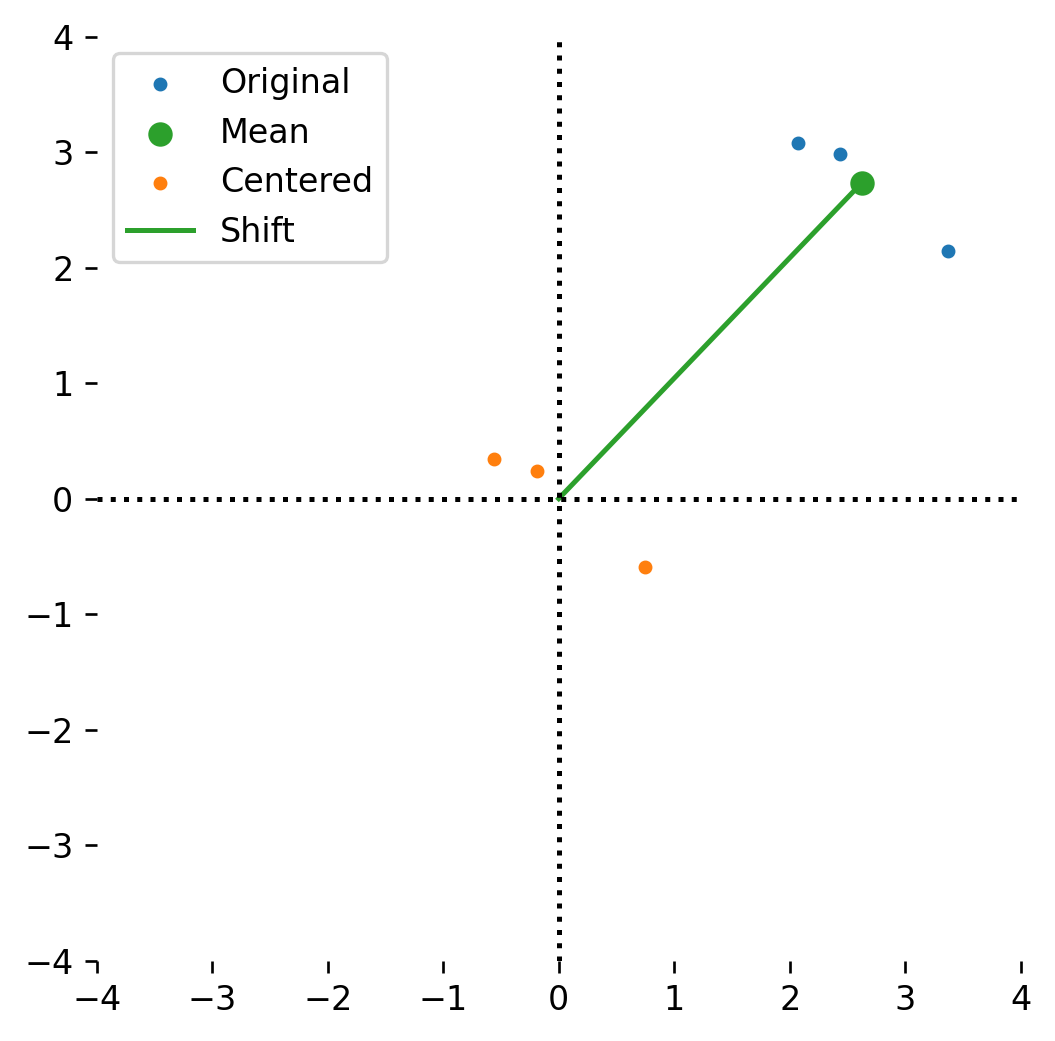

In [17]:
# show the effect of centering a collection of vectors
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# original
ax.scatter(x[:,0], x[:,1], c='C0', label="Original", s=10)
# original mean
ax.scatter(mu[0], mu[1], c='C2', label="Mean", s=40)

# centered
ax.scatter(x_center[:,0], x_center[:,1], c='C1', label="Centered", s=10)
ax.plot([0, mu[0]], [0, mu[1]], c='C2', label='Shift')

# draw origin and fix axes
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_frame_on(False)
ax.axhline(0, c='k', ls=':')
ax.axvline(0, c='k', ls=':')
ax.set_aspect(1.0)
ax.legend()

### Median is harder
Note that other statistical operations like the median can be generalised to higher dimensions, but it is much more complex to do so, and there is no simple direct algorithm for computing the **geometric median**. This is because the are *not* just combined operations of scalar multiplication and vector addition.

-----
-----

# High-dimensional vector spaces
Vectors in low dimensional space, such as 2D and 3D are familiar in their operation. However, data science often involves **high dimensional vector spaces**, which obey the same mathematical rules as we have defined, but whose properties are sometimes unintuitive.

Many problems in machine learning, optimisation and statistical modelling involve using *many measurements*, each of which has a simple nature; for example, an image is just an array of luminance measurements. A 512x512 image could be considered a single vector of 262144 elements. We can consider one "data point" to be a vector of measurements. The dimension $d$ of these "feature vectors" has a massive impact on the performance and behaviour of algorithmics and many of the problems in modelling are concerned with dealing with high-dimensional spaces.

High-dimensional can mean any $d>3$; a 20-dimensional feature set might be called medium-dimensional; a 1000-dimensional might be called high-dimensional; a 1M-dimensional dataset might be called extremely high-dimensional. These are loose terms, and vary from discipline to discipline.

## Geometry in high-D
The geometric properties of high-d spaces are very counter-intuitive. The volume of space increases exponentially with $d$ (e.g. the volume of a hypersphere or hypercube). There is *a lot* of empty space in high-dimensions, and where data is sparse it can be difficult to generalise in high-dimensional spaces. Some research areas, such as genetic analysis often have $n<<d$; i.e. many fewer samples than measurement features (we might have 20000 vectors, each with 1 million dimensions). 

    
### Curse of dimensionality    
Many algorithms that work really well in low dimensions break down in higher dimensions. This problem is universal in data science and is called the **curse of dimensionality**. Understanding the curse of dimensionality is critical to doing any kind of data science.

#### Example: sailing weather station

Imagine we build a weather station for mounting on a sailing craft, to measure local atmospheric conditions during voyages. This seems like an innocuous problem.

<img src="imgs/sailing.jpg"> <br><br>*.[Image](https://flickr.com/photos/16633132@N04/33932787224 "Departing Grutness IMG_2486") by [Ronnierob](https://flickr.com/people/16633132@N04) license [CC BY-SA](https://creativecommons.org/licenses/by-sa/2.0/)*

We want to be able to summarise the weather conditions encountered.  Every few minutes we measure a number of variables: wind speed, temperature, humidity, sunshine hours, etc. As a simple visualisation, we could use a histogram to count the number of data points falling into bins. This might let us do simple predictions, such as: *is it likely to be above 30C tomorrow?*

Let's say we measure temperatures and have 10,000 measurements. We might have a histogram with division into 10 bins; each bin would receive hundreds if not thousands of data points. So our histogram will be a fairly reliable summary of the weather. The size of each bin will have lots of evidence to support it.

Text(0.5, 1.0, 'Simulated temperature')

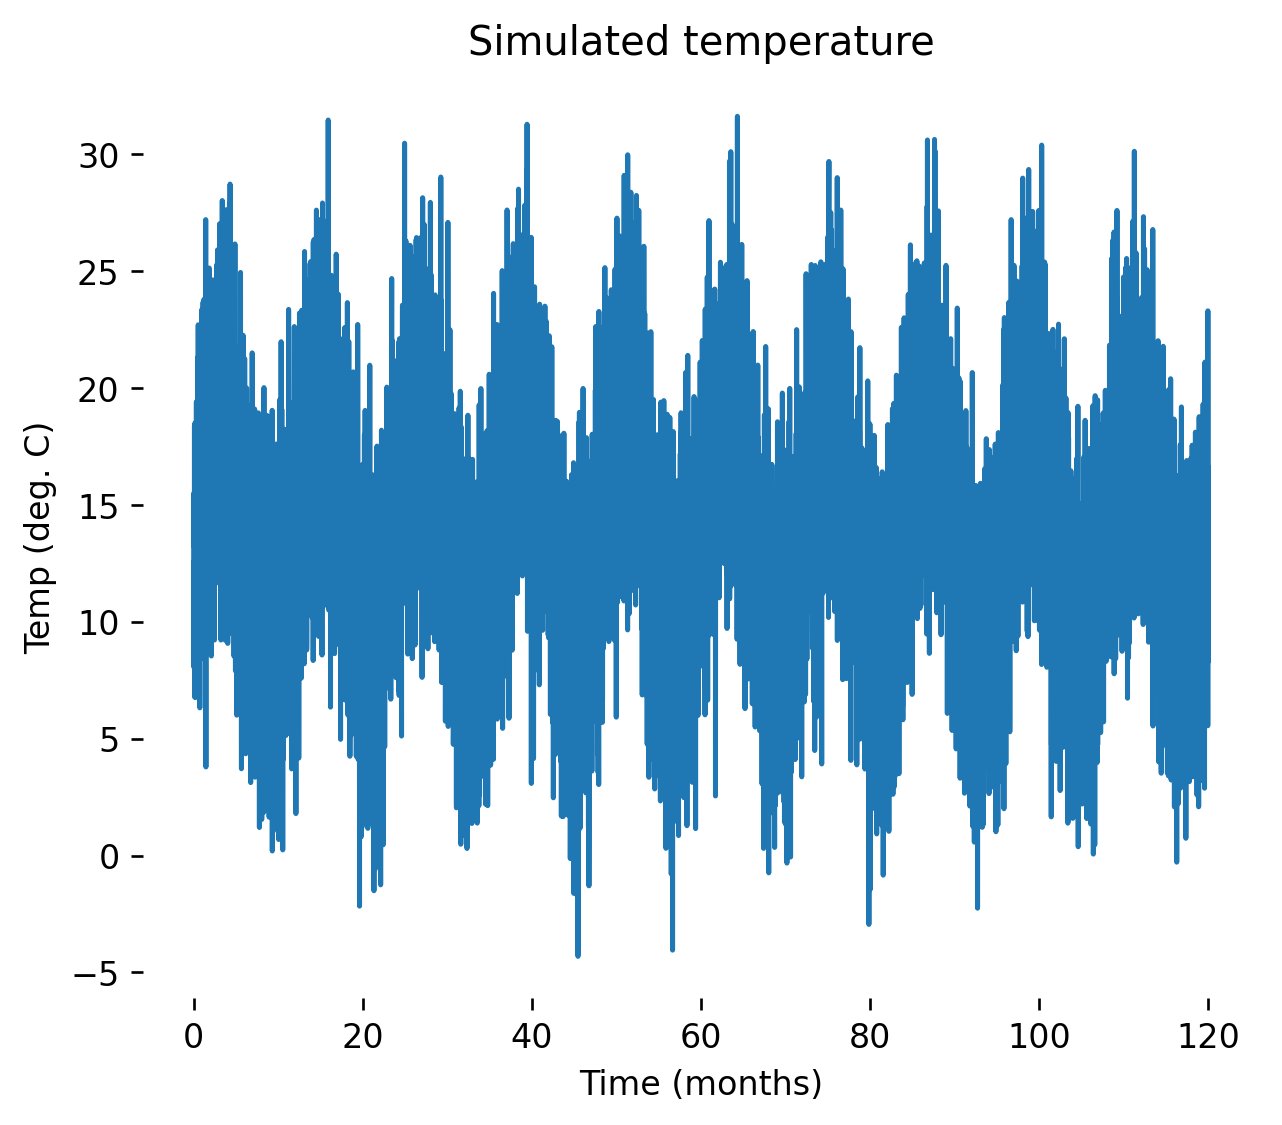

In [18]:
time = np.linspace(0,120,10000)
season = np.sin(2*np.pi*time/12.0)
temps = np.random.normal(14.0, 4.0, time.shape) + season * 5
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(time, temps)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Temp (deg. C)")
ax.set_frame_on(False)
ax.set_title("Simulated temperature")

Text(0, 0.5, 'Count')

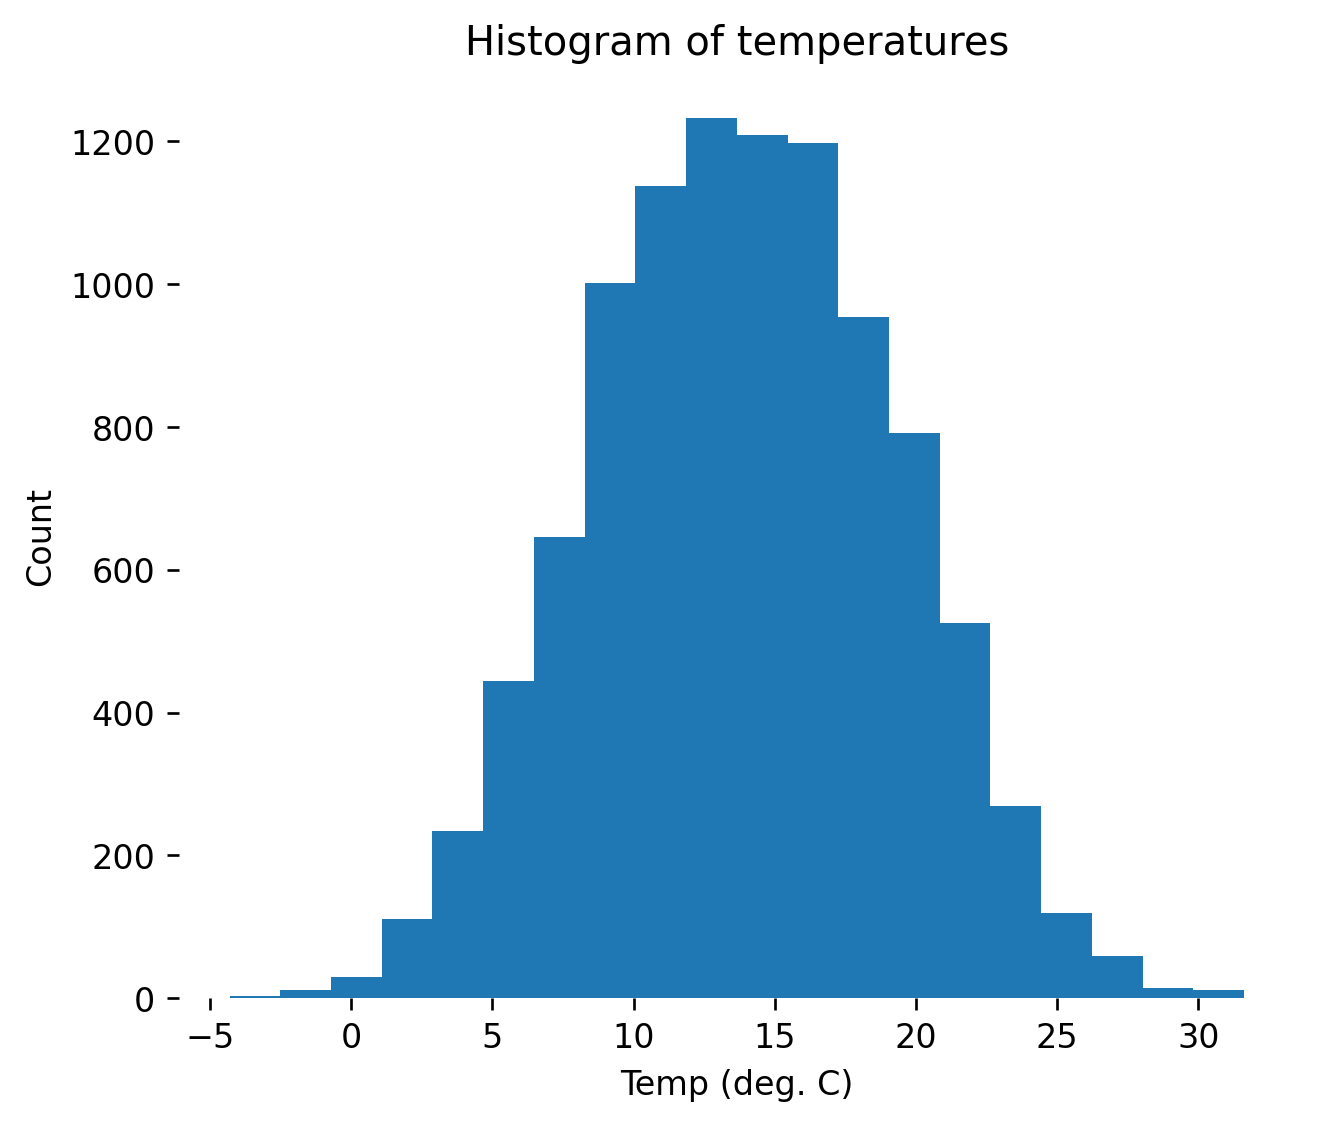

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(temps, bins=20)
ax.set_frame_on(False)
ax.set_title("Histogram of temperatures")
ax.set_xlabel("Temp (deg. C)")
ax.set_ylabel("Count")

Now maybe we also measure humidity, and compute a 2D histogram for each of our 10,000 (temp, humidity) pairs.


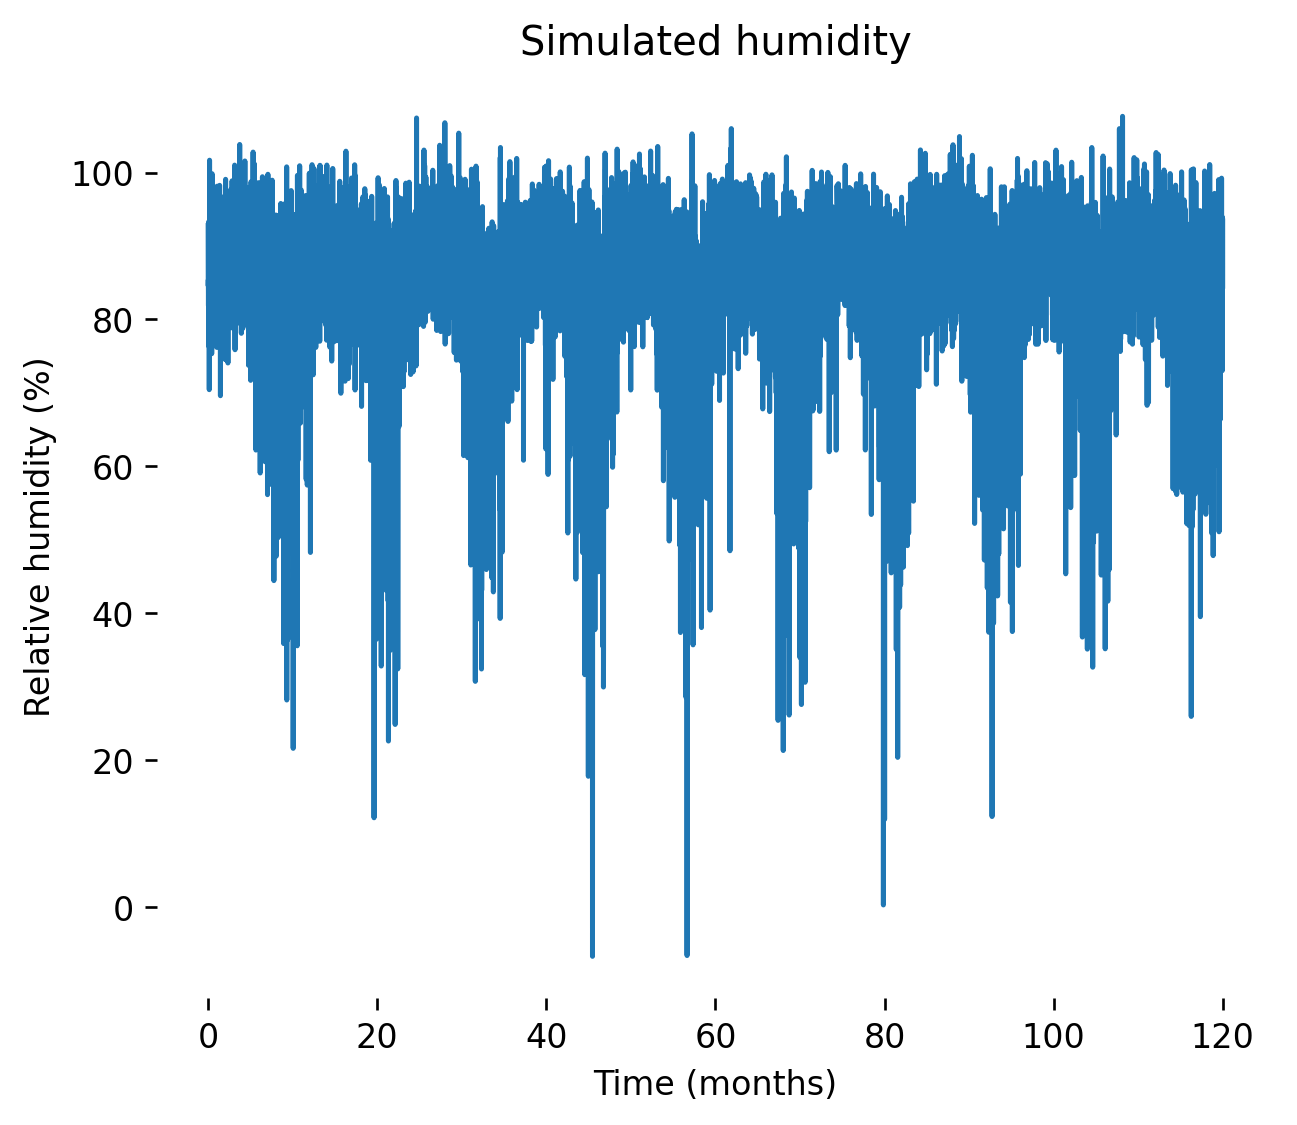

In [20]:
humidity = np.random.normal(np.tanh(temps*0.15)*60+30, 5, time.shape)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Relative humidity (%)")
ax.set_title("Simulated humidity")
ax.set_frame_on(False)
ax.plot(time, humidity)

Now we plot a 2D histogram representing the *combinations* of temperature and humidity experienced.

Text(0.5, 1.0, '2D histogram of temperature and humidity')

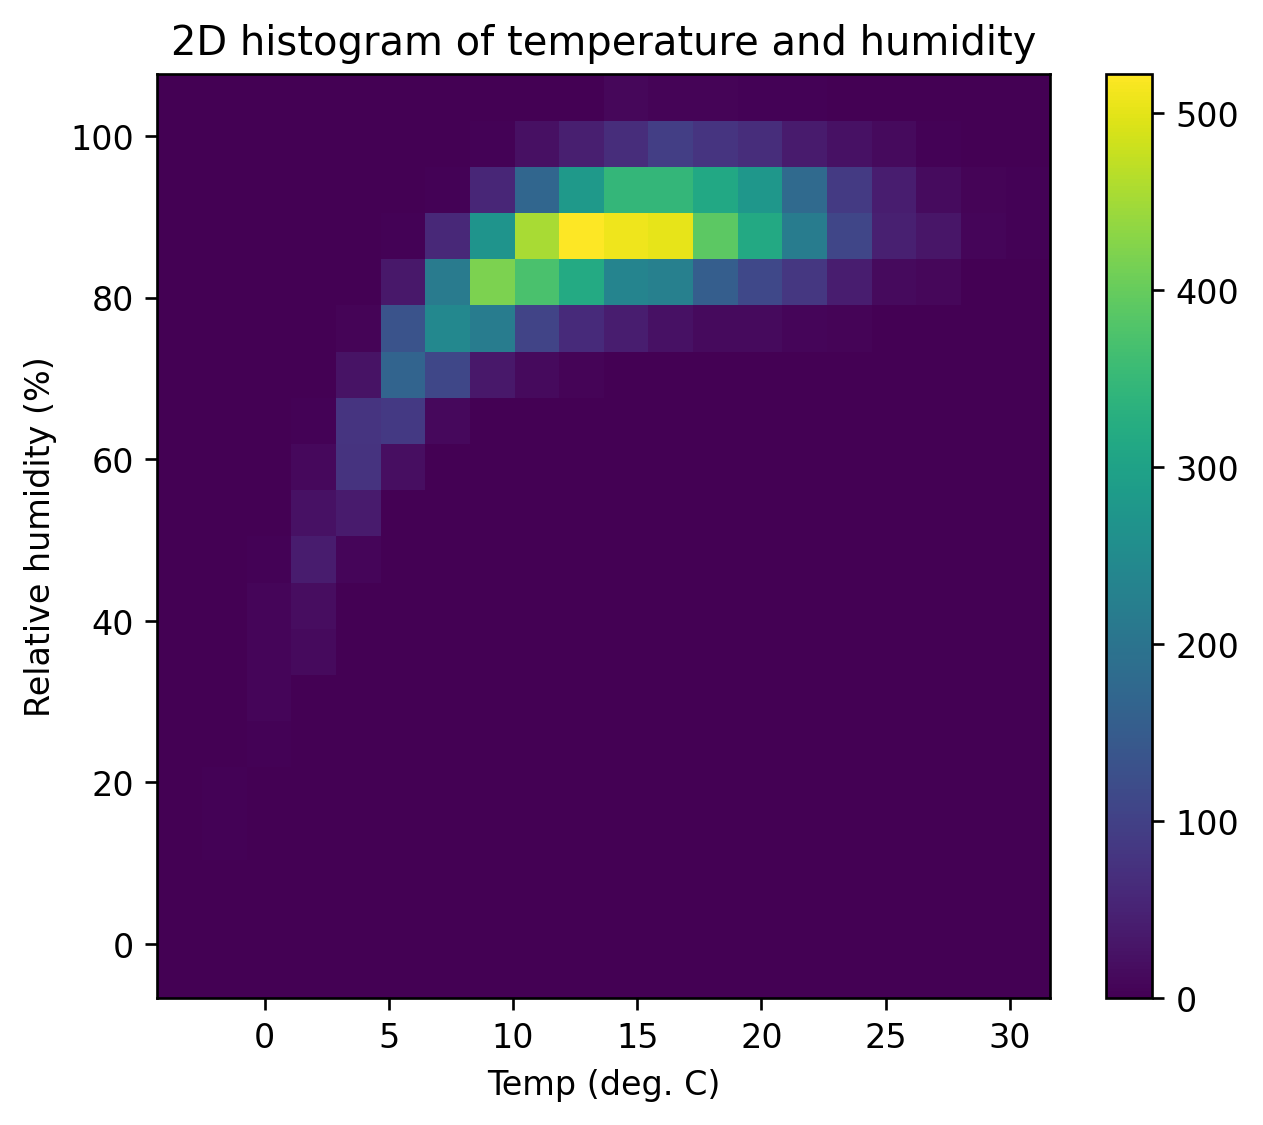

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
bar = plt.hist2d(temps, humidity, bins=(20,20));
ax.set_xlabel("Temp (deg. C)")
ax.set_ylabel("Relative humidity (%)")
fig.colorbar(bar[-1])
ax.set_title("2D histogram of temperature and humidity")

#### How many bins left?
Now there are 20 bins in each dimension, for 400 bins total. Each bin only gets ~500 or so measurements at most, and in practice most bins are empty and a few are heavily populated.

#### High-D histograms don't work
If we had 10 different measurements (air temperature, air humidity, latitude, longitude, wind speed, wind direction, precipitation, time of day, solar power, sea temperature) and we wanted to subdivide them into 20 bins each, we would need a histogram with $20^{10}$ bins -- over ***10 trillion*** bins. 

But we only have 10,000 measurements; so we'd expect that virtually every bin would be empty, and that a tiny fraction of bins (about 1 in a billion in this case) would have probably one measurement each. Not to mention a naive implementation would need memory space for 10 trillion counts -- even using 8 bit unsigned integers this would be 10TB of memory!

This is the problem of sparseness in high-dimensions. There is a lot of volume in high-D, and geometry does not work as you might expect generalising from 2D or 3D problems.

* **Curse of dimensionality: as dimension increases generalisation gets harder *exponentially***

### The dark heart of Africa
<img src="imgs/africa_heart.jpg" width=80%>

*Africa in 1861. Public domain. Everything is empty in the middle -- apparently*

### Paradoxes of high dimensional vector spaces
Here are some high-d "paradoxes":
#### Think of a box
* Imagine an empty box in high-D (a hyper cube). (good luck imagining it!)
    * Fill it with random points. For any given point, in high enough dimension, the boundaries of the box will be closer than any other point in the box.
    * Not only that, but every point will be nearly the same (Euclidean, $L_2$) distance away from any other point.
    * The box will have $2^d$ corners. For example, a 20D box has more than 1 million corners.
    * For $d>5$ more of the volume is in the areas close to the corners than anywhere else; by $d=20$  the overwhelming volume of the space is in the corners.
    * Imagine a sphere sitting in the box so the sphere's surface just touches the edges of the box (an inscribed sphere). As D increases, the sphere takes up less and less of the box, until it is a vanishingly small proportion of the space.
    * Fill the inner sphere with random points. **Almost all of them** are within in a tiny shell near the surface of the sphere, with virtually none in the centre.

#### Spheres in boxes
Although humans are terrible at visualising high dimensional problems, we can see some of the properties of high-d spaces visually by analogy.
<img src="imgs/ballbox.png">

The volume of a n-D sphere with diameter $1$  is $$ V_n(R) = \frac{\pi^{n/2}}{\Gamma({n/2}+1)}\frac{1}{2}^n$$ (you definitely don't need to know this formula -- it's just to show how this is computed).

The volume of a unit cube is just $$1^n=1$$

In [22]:
import scipy.special # for the gamma function

def sphere_volume(n):
    return 0.5**n * np.pi**(n/2.0) / scipy.special.gamma(n/2.0+1)

# this one is easy...
def cube_volume(n):
    return 1.0

Text(0.5, 1.0, 'Volume of sphere as fraction of circumscibed cube vs. dimension')

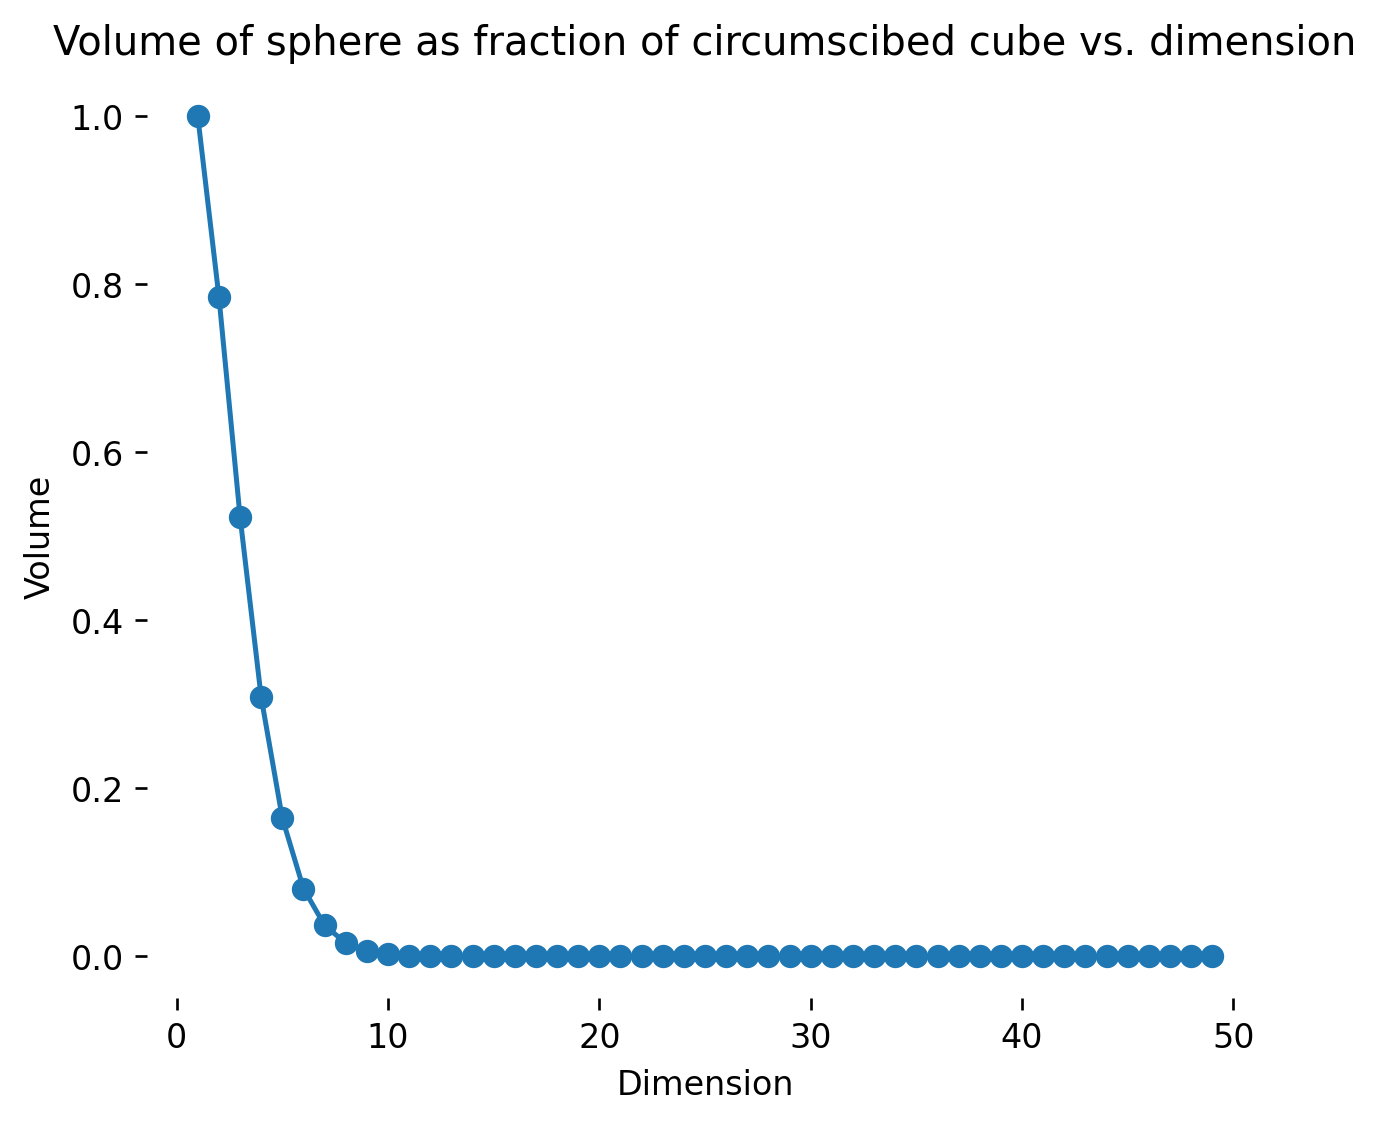

In [23]:
x = np.arange(1,50)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, [sphere_volume(xi) for xi in x], 'o-')
ax.set_xlabel("Dimension")
ax.set_ylabel("Volume")
ax.set_frame_on(False)
ax.set_title("Volume of sphere as fraction of circumscibed cube vs. dimension")

Text(0.5, 1.0, 'Volume of sphere as fraction of circumscibed cube vs. dimension (log scale)')

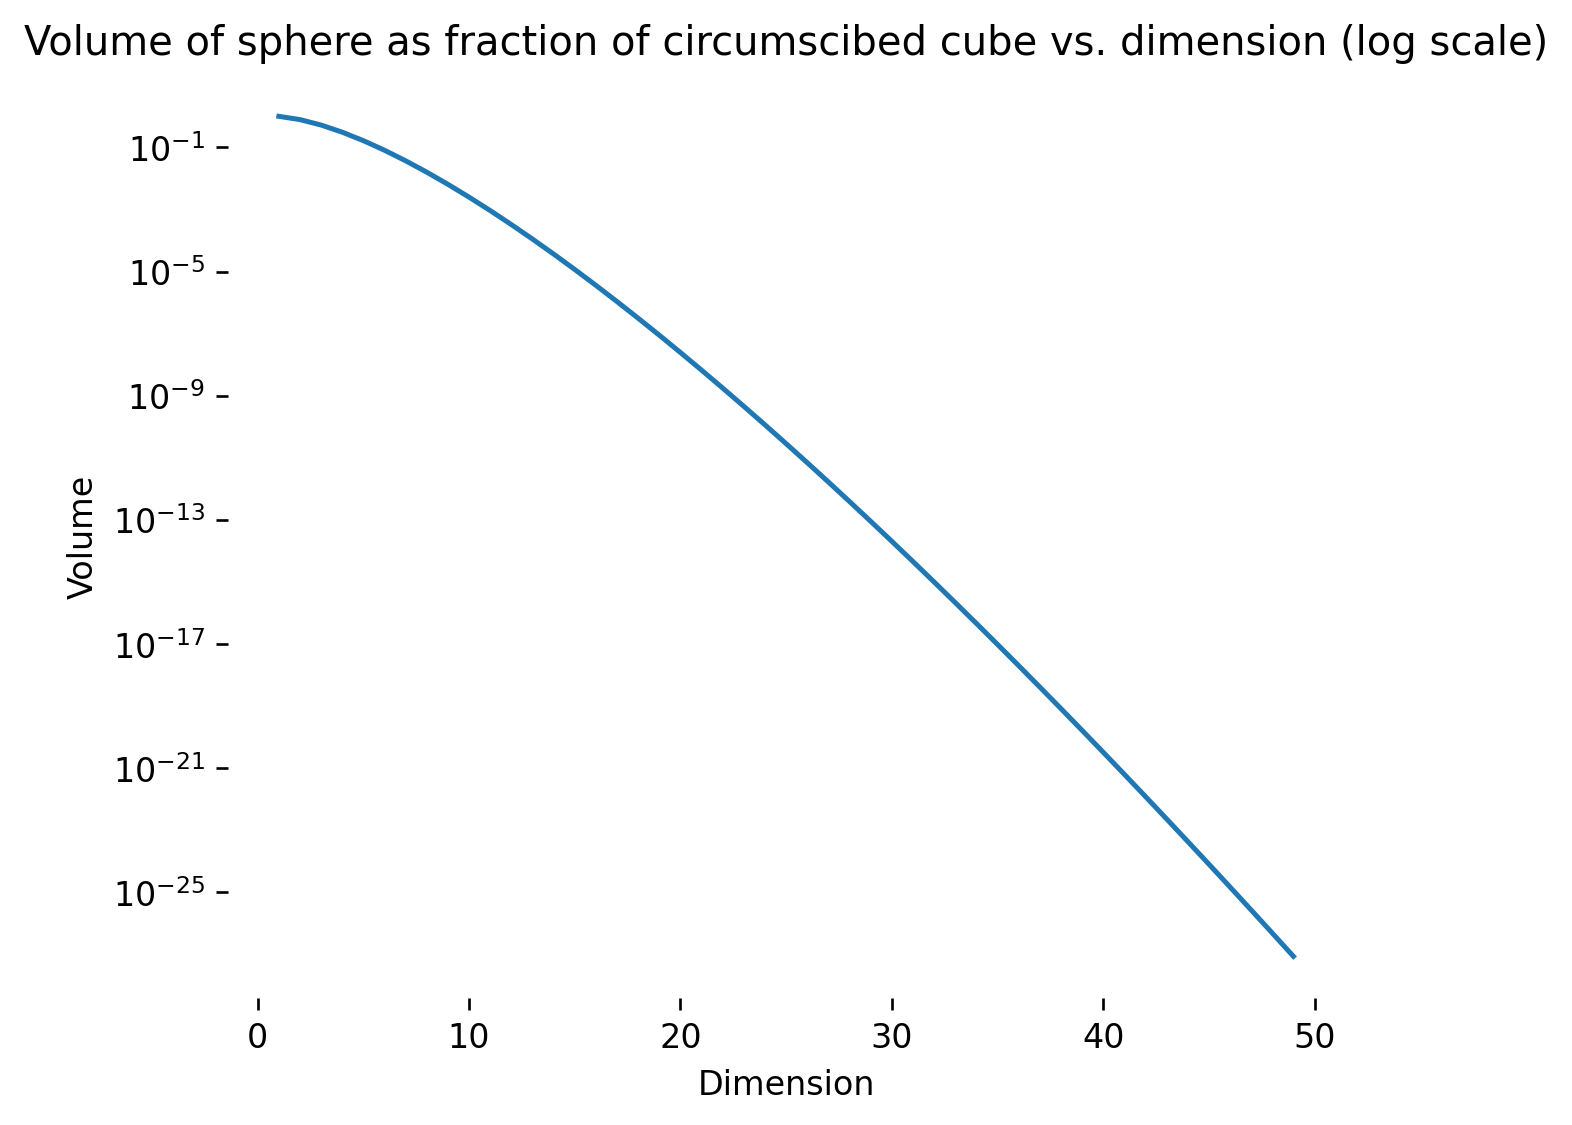

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.semilogy(x, [sphere_volume(xi) for xi in x])
ax.set_xlabel("Dimension")
ax.set_ylabel("Volume")
ax.set_frame_on(False)
ax.set_title("Volume of sphere as fraction of circumscibed cube vs. dimension (log scale)")

#### A box in space


In [25]:
# let's do an experiment
d = 1  # dimensions
n = 100_000 # number of points

# cube, at origin, n-dimensional
points_in_box = np.random.uniform(-1, 1, (n,d))

# select all points with radius < 1 (inside sphere in that box)
points_in_sphere = points_in_box[
    np.linalg.norm(points_in_box,axis=1)<1]

# how many points are in the sphere compared to the box?
print("Points in box: {n_pts}; Points in sphere:{n_sphere}, ratio:{ratio:.4f}%".format(n_pts=len(points_in_box), 
                                                                                       n_sphere=len(points_in_sphere), 
                                                                ratio=100*len(points_in_sphere)/len(points_in_box)))

# How far away are the points in the sphere from the origin (mean radius)
print("Mean radius of points in sphere", np.mean(np.linalg.norm(points_in_sphere, axis=1)))

# How far away are the points in the box from the edges of the box
distance_to_walls = 1.0 - np.linalg.norm(points_in_box, np.inf, axis=1)

print("Mean distance to nearest wall of the box", np.mean(distance_to_walls))

Points in box: 100000; Points in sphere:100000, ratio:100.0000%
Mean radius of points in sphere 0.4994637689584978
Mean distance to nearest wall of the box 0.5005362310415021


#### Distances don't work so well
If we compute the distance between two random high-dimensional vectors in the Euclidean norm, the results will be *almost the same*. Almost all points will be a very similar distance apart from each other. 

Other norms like the $L_{\inf}$ or $L_1$ norm, or the cosine distance (normalised dot product) between two vectors $\vec{x}$ and $\vec{y}$ are less sensitive to high dimensional spaces, though still not perfect.

Mean:  2.537436949958667
Var:  0.23897143539284094


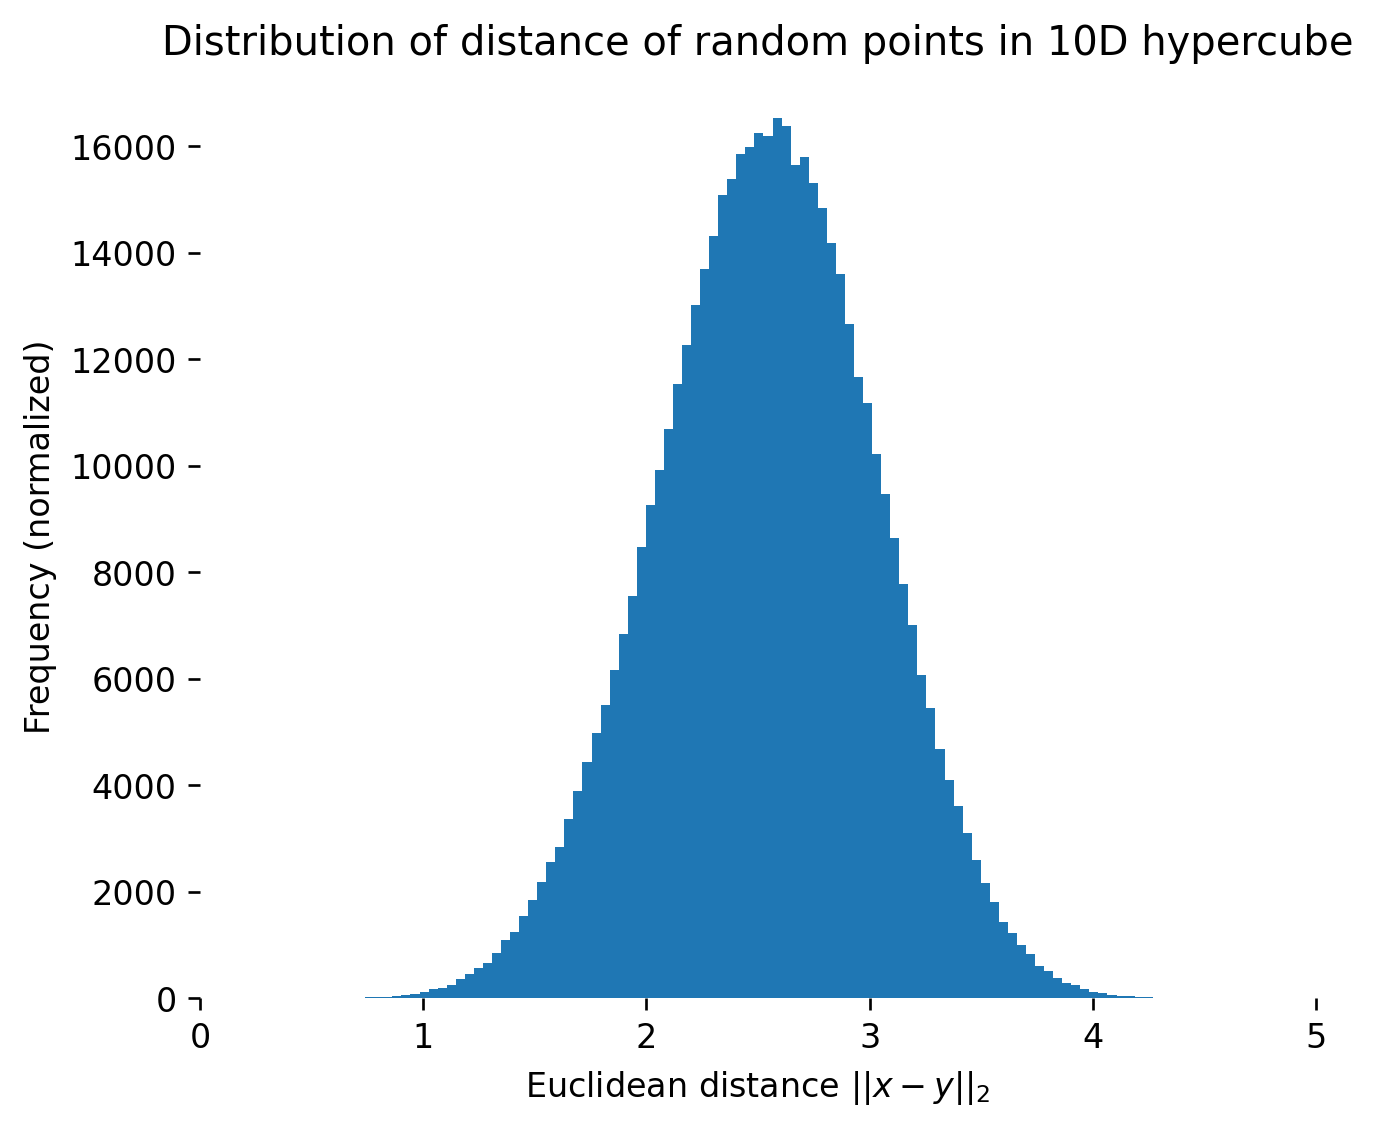

In [26]:
# Show that random points are in fact almost all the same distance away from each other!
import scipy.spatial as sp # just allows us to compute inter-point distances quickly

d = 10
p = 2

# 100 random points in a length 2 cube in d-dimensional space
pts = np.random.uniform(-1,1,(1000,d))

# plot the distances
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
distances = sp.distance.pdist(pts, metric='euclidean').ravel()
distances = distances[distances!=0] # remove the zero distances of a vector to itself
m = np.mean(distances)
# ax.hist(distances, bins=100, normed=True)
ax.hist(distances, bins=100)
ax.set_xlim(np.max((0,m-10.0)),m+20)
ax.set_xlim(0,5)
ax.set_xlabel("Euclidean distance $||x-y||_{p}$".format(p=p))
ax.set_ylabel("Frequency (normalized)")
ax.set_frame_on(False)
ax.set_title("Distribution of distance of random points in {d}D hypercube".format(d=d))

print("Mean: ",np.mean(distances))
print("Var: ",np.var(distances))

Imagine living in a world where *every* city was less than 20 miles away, but there were no cities at all less than 15 miles away!

---
---

# Matrices and linear operators

## Uses of matrices
We have seen that (real) vectors represent elements of a vector space as 1D arrays of real numbers (and implemented as ndarrays of floats). 

Matrices represent **linear maps** as 2D arrays of reals; $\real^{m\times n}$.

* Vectors represent "points in space"
* Matrices represent *operations* that do things to those points in space. 

The operations represented by matrices are a particular class of functions on vectors -- "rigid" transformations. Matrices are a very compact way of writing down these operations.

### Operations with matrices
There are many things we can do with matrices:

* They can be added and subtracted $C=A+B$ 
    *  $(\real^{n\times m},\real^{n\times m}) \rightarrow \real^{n\times m}$
* They can be scaled with a scalar $C = sA$
    * $(\real^{n\times m},\real) \rightarrow \real^{n\times m}$
* They can be transposed $B = A^T$; this exchanges rows and columns
    * $\real^{n\times m} \rightarrow \real^{m\times n}$
* They can be *applied to vectors* $\vec{y} = A\vec{x}$; this **applies** a matrix to a vector.
    * $(\real^{n\times m}, \real^{m}) \rightarrow \real^{n}$
* They can be *multiplied together* $C = AB$; this **composes** the effect of two matrices 
    * $(\real^{p\times q}, \real^{q\times r})\rightarrow \real^{p\times r}$




## Intro to matrix notation
We write matrices as a capital letter: 

$$A \in \real^{n \times m}=  \begin{bmatrix}
a_{1,1}  & a_{1,2} & \dots & a_{1,m}  \\
a_{2,1}  & a_{2,2}  & \dots & a_{2,m}  \\
\dots \\
a_{n,1} + & a_{n,2}  & \dots & a_{n,m} \\
\end{bmatrix},\  a_{i,j}\in \real$$

(although we don't usually write matrices with capital letters in code -- they follow the normal rules for variable naming like any other value)

A matrix with dimension $n \times m$ has $n$ rows and $m$ columns (remember this order -- it is important!). Each element of the matrix $A$ is written as $a_{i,j}$ for the $i$th row and $j$th column.

Matrices correspond to the 2D arrays / rank-2 tensors we are familiar with from earlier. But they have a very rich mathematical structure which makes them of key importance in computational methods. *Remember to distinguish 2D arrays from the mathematical concept of matrices. Matrices (in the linear algebra sense) are represented by 2D arrays, as real numbers are represented by floating-point numbers*

In [27]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

print_matrix("A", a)
# note that code indexes from 0, whereas mathematical notation indexes from 1!

print_matrix("A_{1,3}", a[0,2]) # index row i=0, column j=2

A 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


<IPython.core.display.Latex object>

### Matrices as maps
We saw vectors as **points in space**. Matrices represent **linear maps** -- these are functions applied to vectors which outputs vectors. In the standard notation, matrices are *applied* to vectors by multiplying them:

<div class="alert alert-box alert-success">
    
$$ A{\bf x} = f({\vec x}) $$
</div>

This is equivalent to applying some function $f({\vec x})$ to the vectors. Matrices represent functions mapping vectors to vectors in a very compact form, and they capture a special set of functions that preserve important properties of the vectors they act on. We'll see how matrix-vector multiplication is defined algorithmically shortly.

#### Effect of matrix transform
Specifically, a $n \times m$ matrix $A$ represents a function $f({\bf x})$ taking $m$ dimensional vectors to $n$ dimensional vectors, ($\real^m \rightarrow \real^n$) such that all straight lines remain straight and all parallel lines remain parallel, and the origin does not move (i.e. that the zero vector $\vec{0^m} [0,0,\dots,0]\rightarrow \vec{0^n}[0,0,\dots,0]$).

##### Linearity
This is equivalent to saying that:

<div class="alert alert-box alert-success">
    
$$ 
f(\vec{x}+\vec{y}) = f(\vec{x}) + f(\vec{y}) \quad =  A({\bf x}+{\bf y}) = A{\bf x} + A{\bf y}, \\
f(c\vec{x}) = cf(\vec{x}) \quad = A(c{\bf x}) = cA{\bf x},
$$
    
</div>

i.e. the transform of the sum of two vectors is the same as the sum of the transform of two vectors, and the transform of a scalar multiple of a vector is the same as the scalar multiple of the transform of a vector. This property is **linearity**, and matrices represent **linear maps** or **linear functions**.

> Anything which is linear is easy. Anything which isn't linear is hard.



### Geometric intuition (cube -> parallelepiped)
An intuitive way of understanding matrix operations is to consider a matrix to transform a cube of vector space centered on the origin in one space to a **parallelotope** in another space, with the origin staying fixed. This is the *only* kind of transform a matrix can apply.

A parallelotope is the generalisation of a parallelogram to any finite dimensional vector space, which has parallel faces but edges which might not be at 90 degrees.

<img src="imgs/parallel.png" width=80%>

#### Transforms and projections
* A linear map is any function $f$ $R^m \rightarrow R^n$ which satisfies the linearity requirements.
* If the map represented by the matrix is $n\times n$ then it maps from a vector space onto the *same* vector space (e.g. from $\real^n \rightarrow \real^n$), and it is called a **linear transform**.
* If the map has the property $Ax = AAx$ or equivalently $f(x)= f(f(x))$ then the operation is called a **linear projection**; for example, projecting 3D points onto a plane; applying this transform to a set of vectors twice is the same as applying it once.

### Keeping it real
We will only consider **real matrices** in this course, although the abstract definitions above apply to linear maps across any vector space (e.g complex numbers, finite fields, polynomials).

#### Linear maps are representable as matrices
*Every linear map of real vectors can be written as a real matrix.* In other words, if there is a function $f(\vec{x})$ that satisfies the linearity conditions above, it can be expressed as a matrix $A$.

## Examples

It's easiest to see the effect of matrix operations in low-dimensional vector spaces. Let's visualise some examples of linear transforms (linear maps $A \in \real^{2\times 2}, \real^2 \rightarrow \real^2$), on the 2D plane. 

We will take collections of vectors $\vec{x_1}, \vec{x_2}, \dots$ and then apply various matrices to them. We forms the product $A\vec{x}$, which "applies" the matrix to the vector $x$.

Identity 
 [[1 0]
 [0 1]]


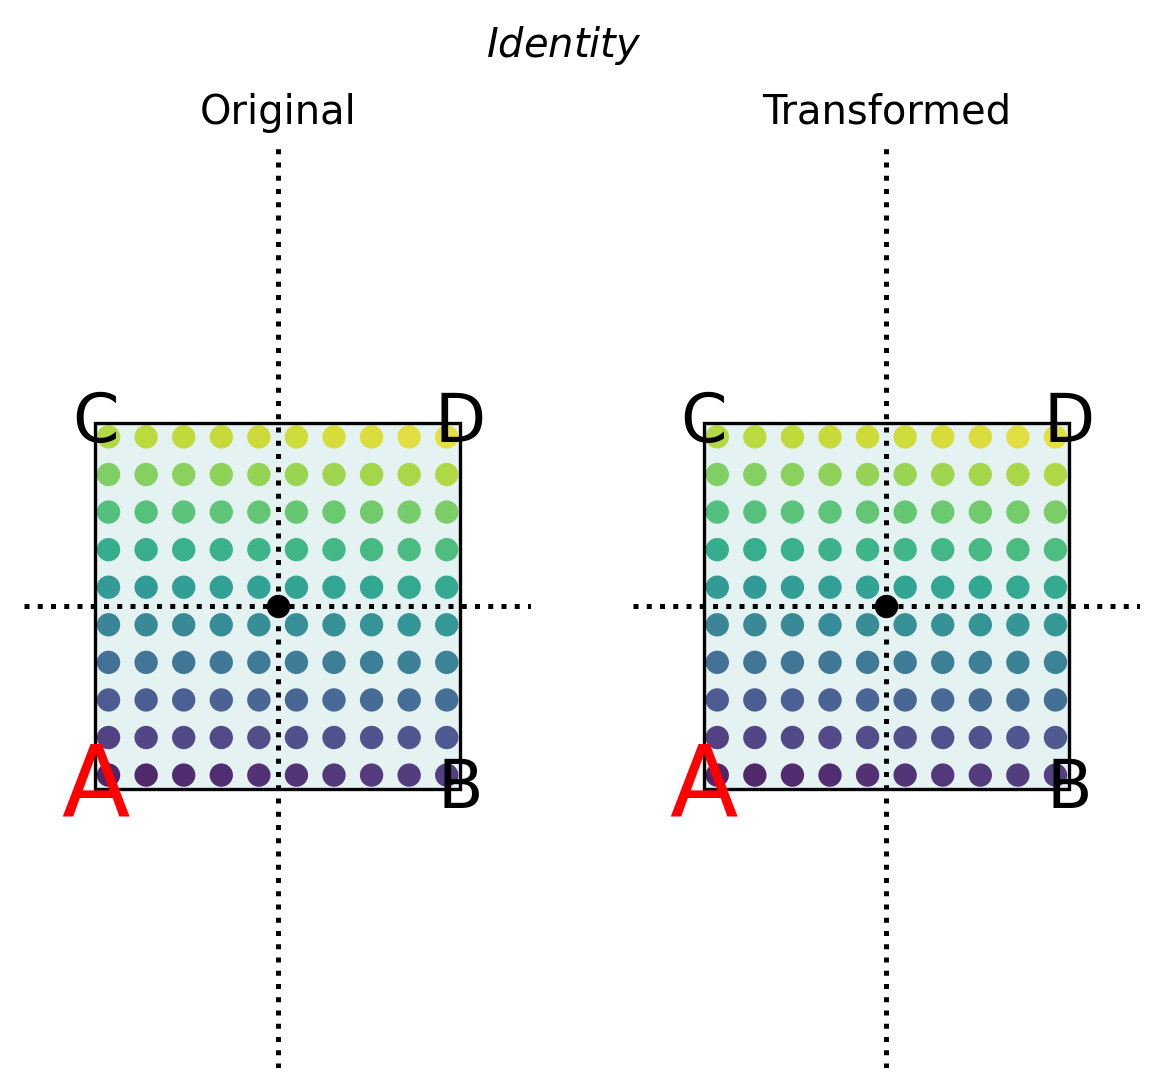

In [28]:
show_matrix_effect(np.array(
        [[1,0], 
         [0,1]]), suptitle="Identity")

Uniform scale 
 [[0.5 0. ]
 [0.  0.5]]


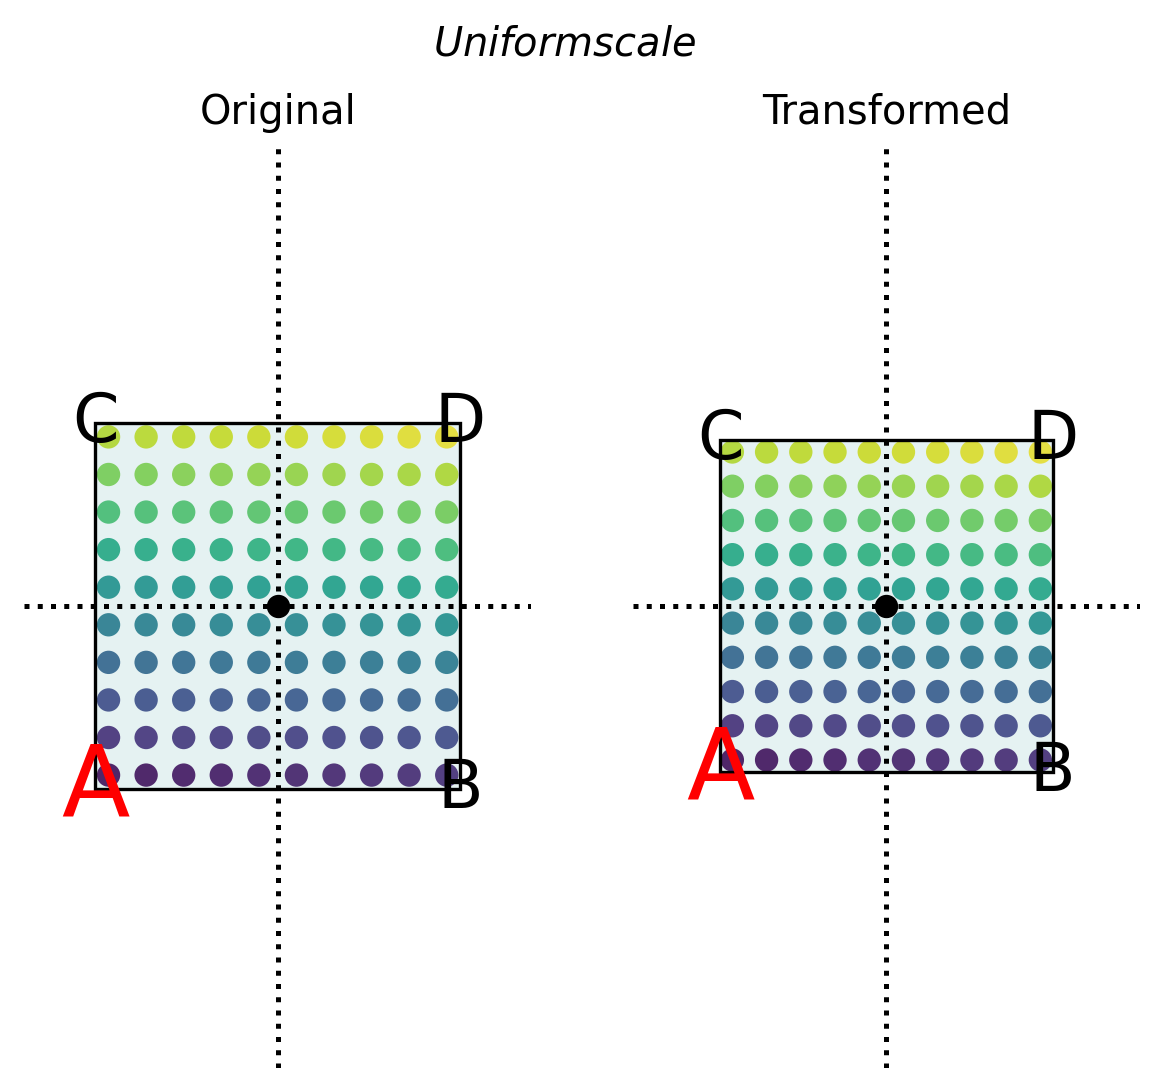

In [29]:
# uniform scaling
show_matrix_effect(np.array(
        [[0.5, 0], 
         [0,   0.5]]), suptitle="Uniform scale")

Non-uniform scale 
 [[0.5 0. ]
 [0.  1. ]]


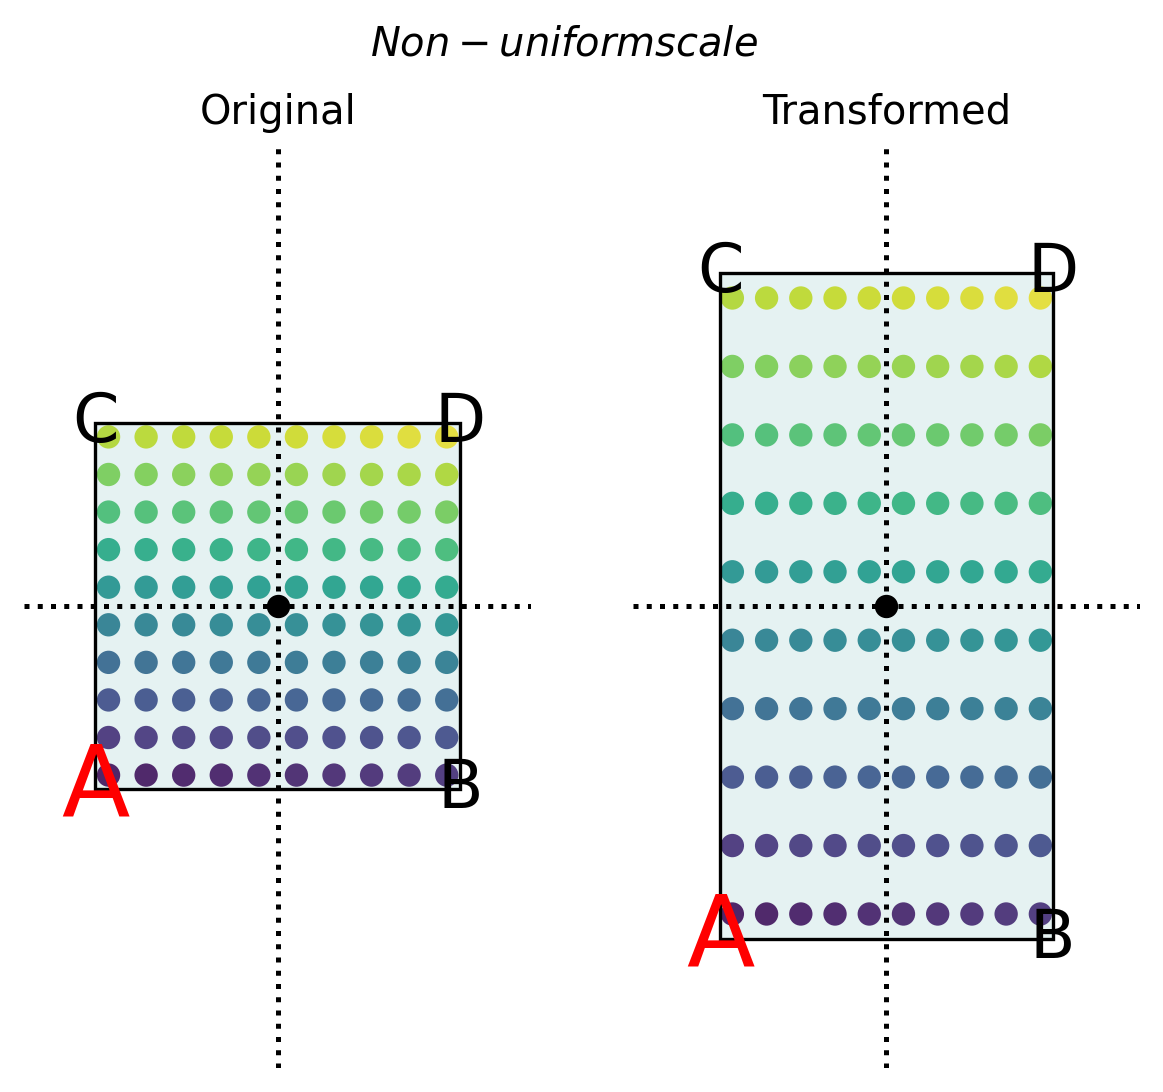

In [30]:
# non-uniform scaling
show_matrix_effect(np.array(
        [[0.5, 0], 
         [0,   1.0]]), suptitle="Non-uniform scale")

Rotate 90 
 [[ 0  1]
 [-1  0]]


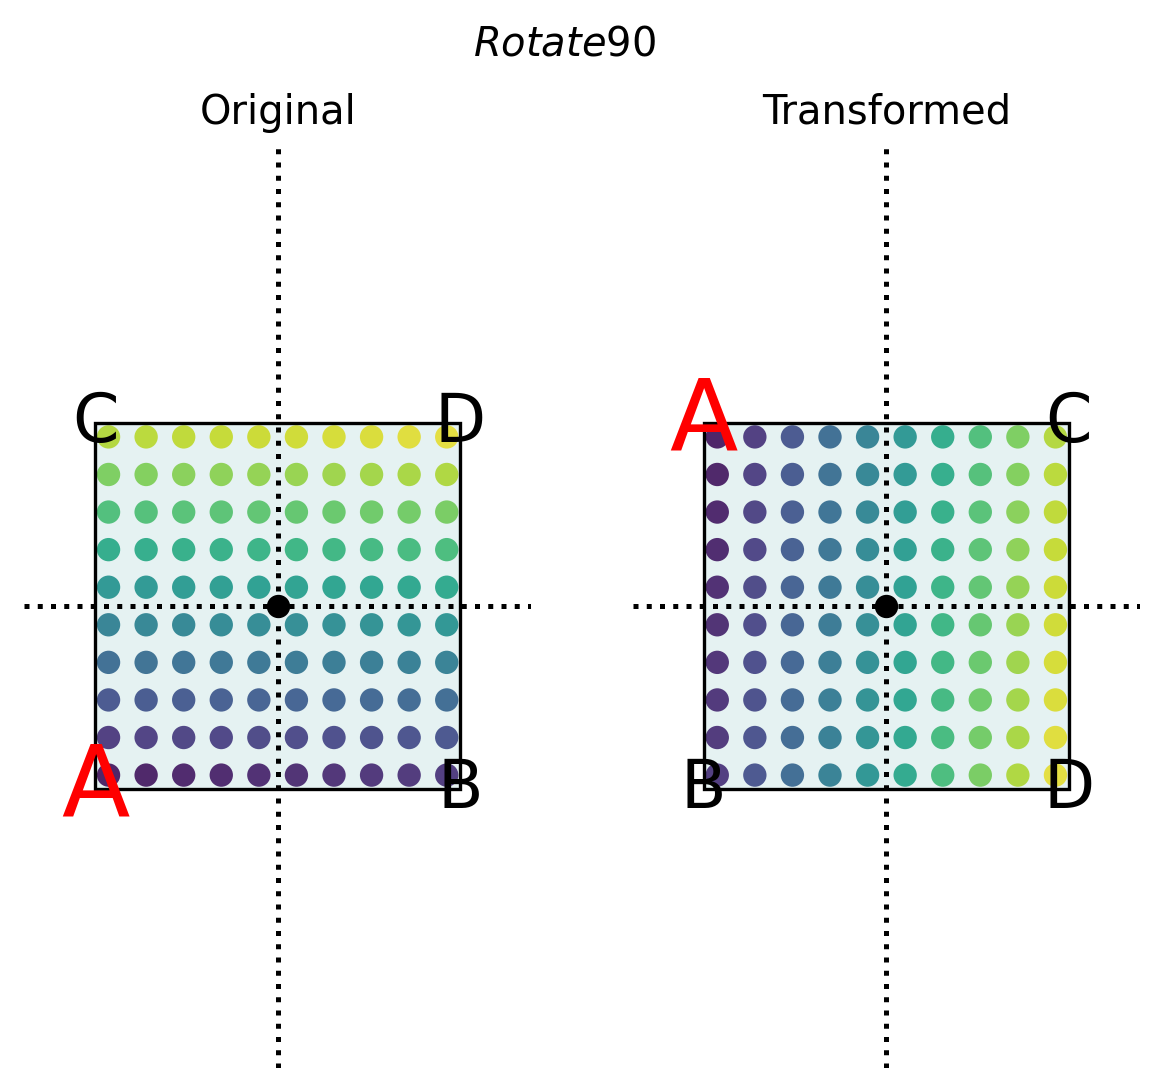

In [31]:
# rotation by 90 degrees
show_matrix_effect(np.array(
        [[0, 1], 
         [-1, 0]]), suptitle="Rotate 90")

Rotate 30 
 [[ 0.87  0.5 ]
 [-0.5   0.87]]


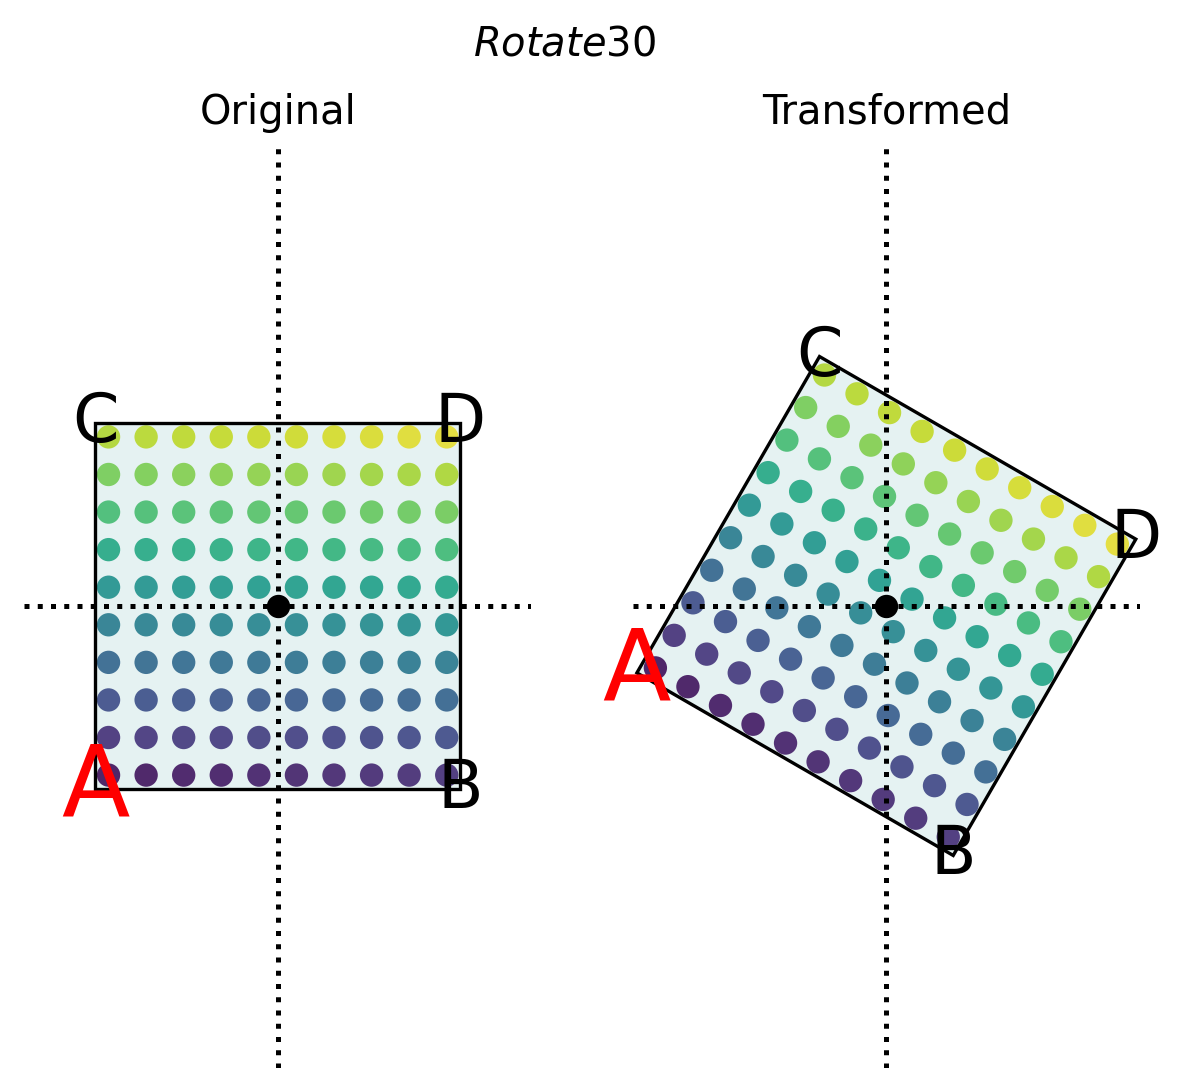

In [32]:
# rotation by 30 degrees
# don't worry about how this matrix is constructed just yet
# but observe its effect
d30 = np.radians(30)
cs = np.cos(d30)
ss = np.sin(d30)

show_matrix_effect(np.array(
        [[cs, ss], 
         [-ss, cs]]), suptitle="Rotate 30")

Rotate 45, Scale 0.5 
 [[ 0.35  0.35]
 [-0.35  0.35]]


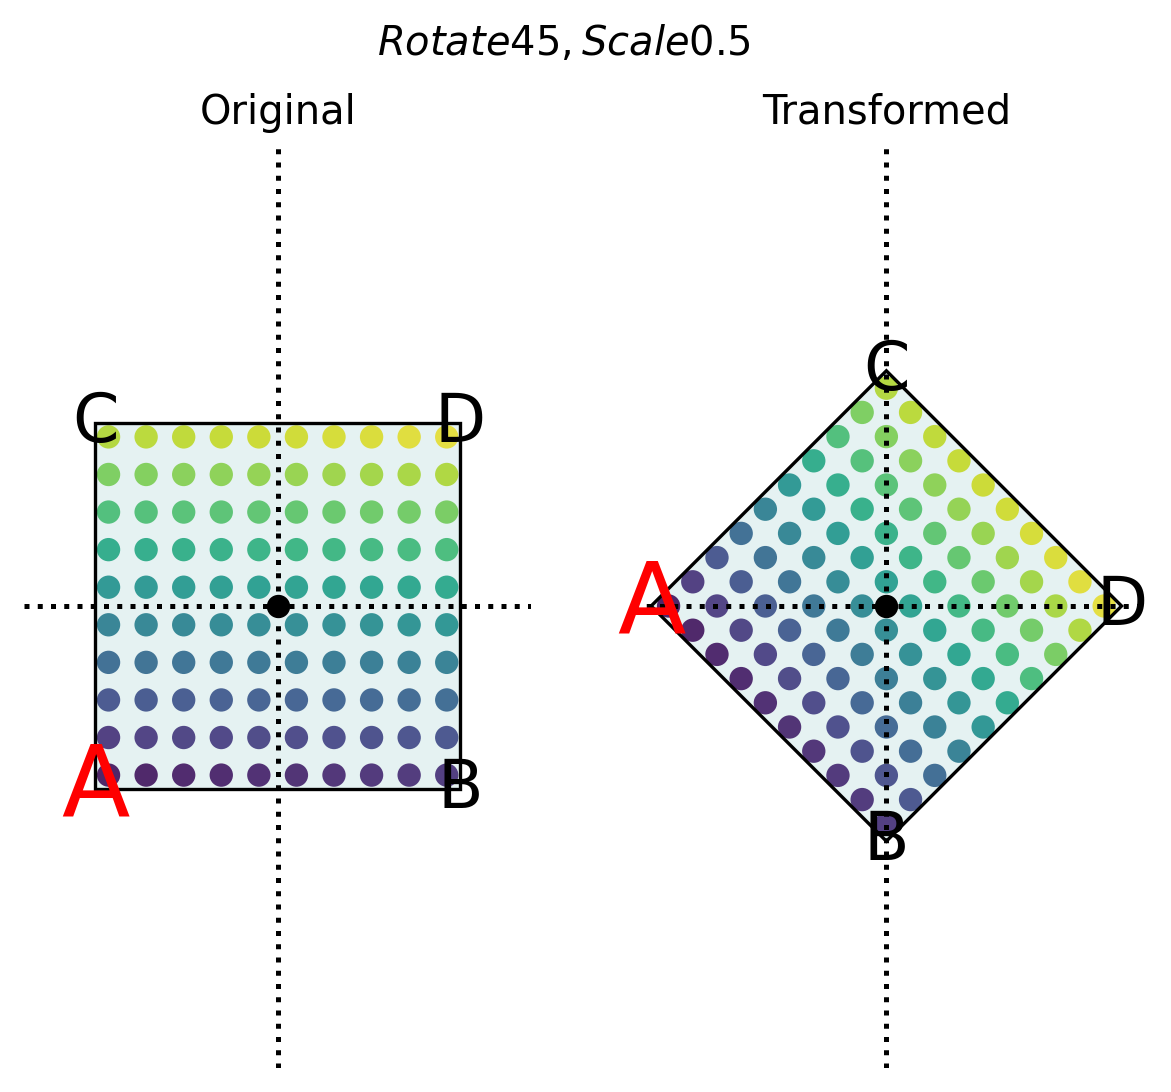

In [33]:
# rotation by 45 degrees, scale by 0.5
d30 = np.radians(45)
cs = np.cos(d30) * 0.5
ss = np.sin(d30) * 0.5

show_matrix_effect(np.array([[cs, ss], 
                             [-ss, cs]]), "Rotate 45, Scale 0.5")

Flip x 
 [[-1  0]
 [ 0  1]]


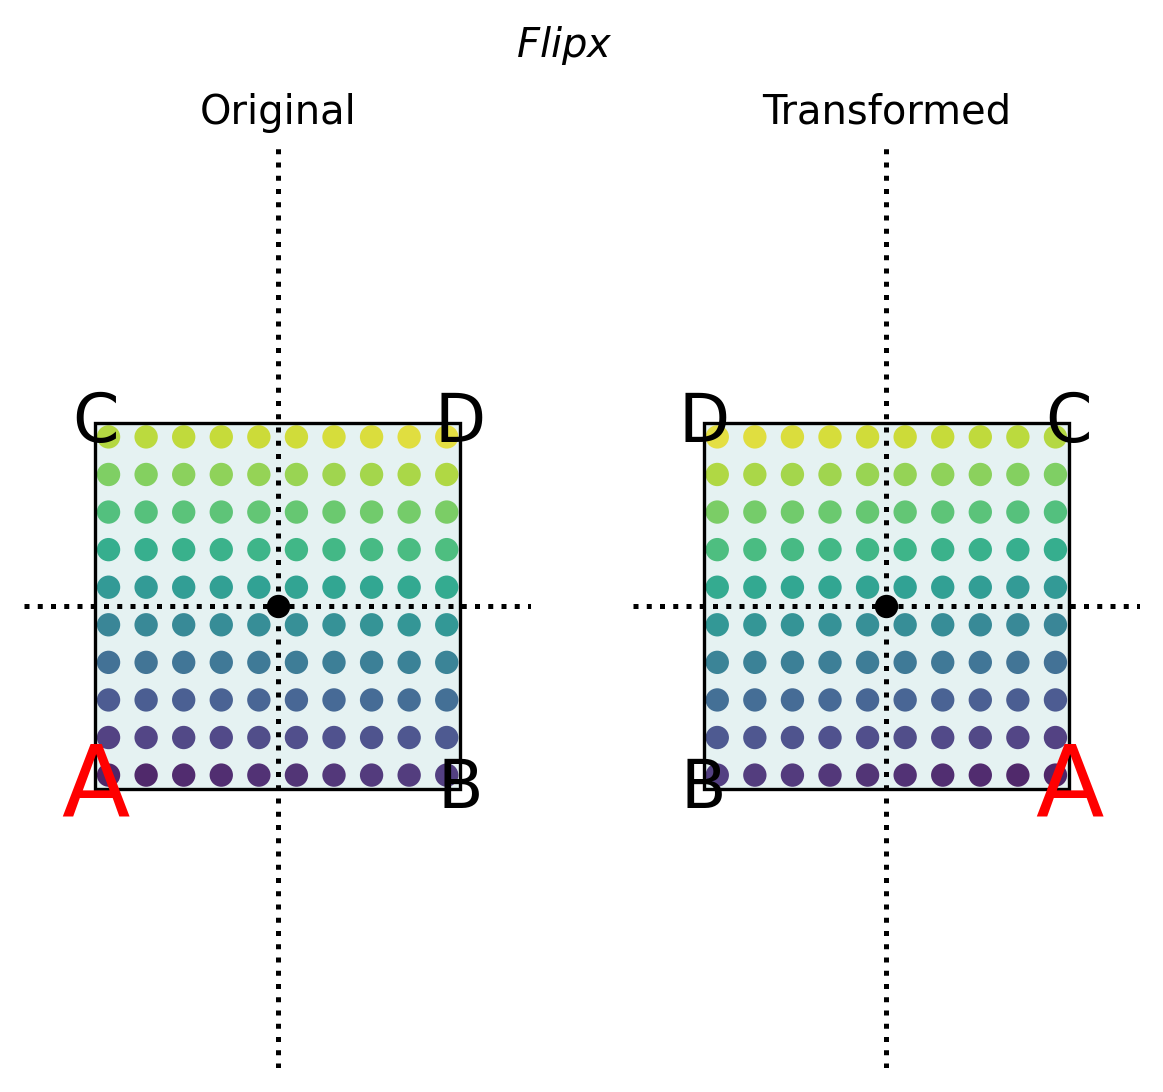

In [34]:
# flip x
show_matrix_effect(np.array([[-1, 0], 
                             [0, 1]]), "Flip x")

Shear 
 [[0.15 0.75]
 [0.5  0.8 ]]


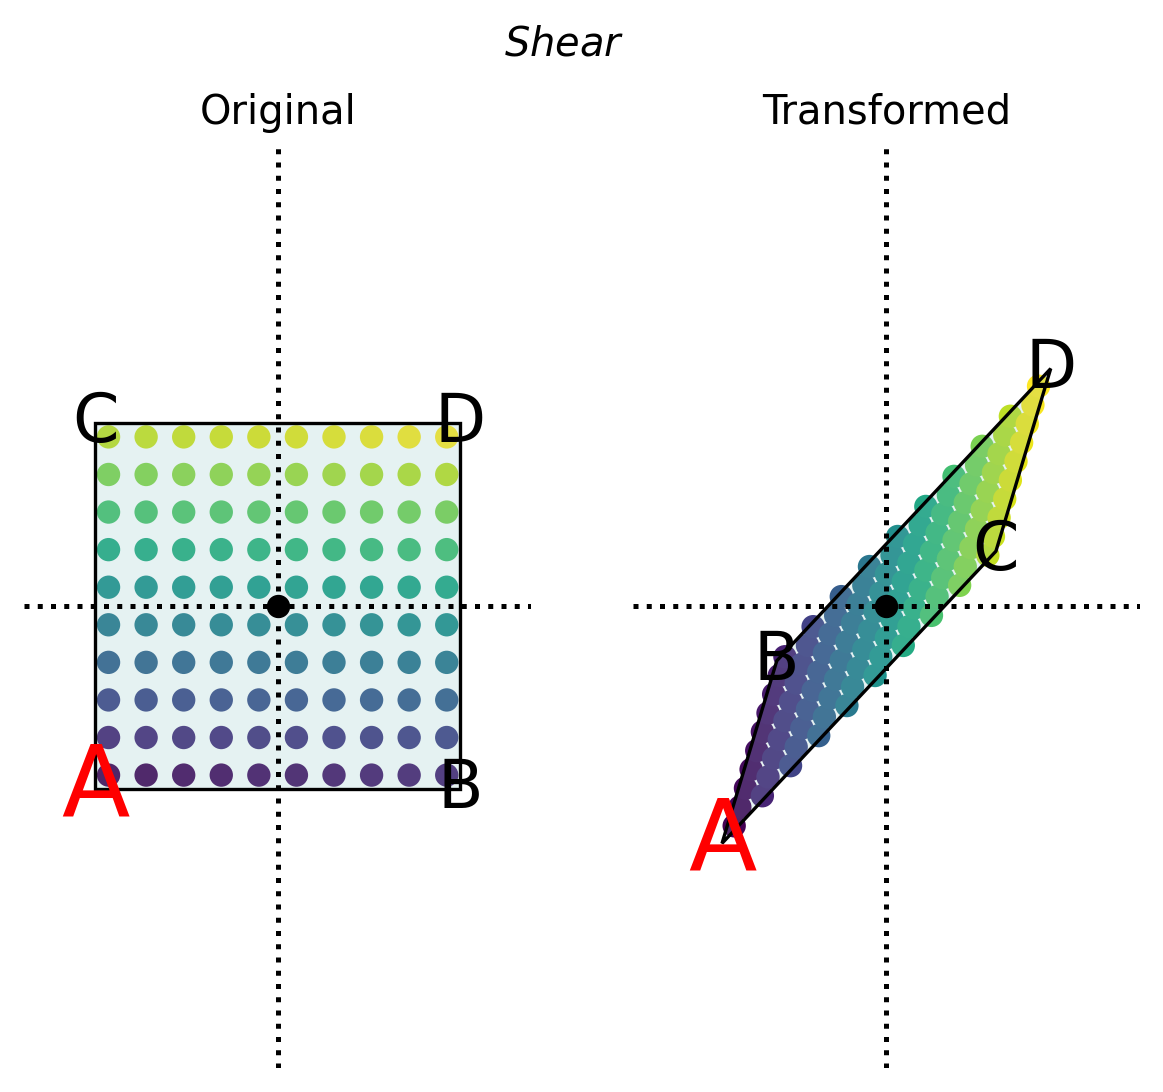

In [35]:
# shear
show_matrix_effect(np.array([[0.15, 0.75], 
                             [0.5, 0.8]]), "Shear")

Random 
 [[-0.31 -0.42]
 [-0.67  0.25]]


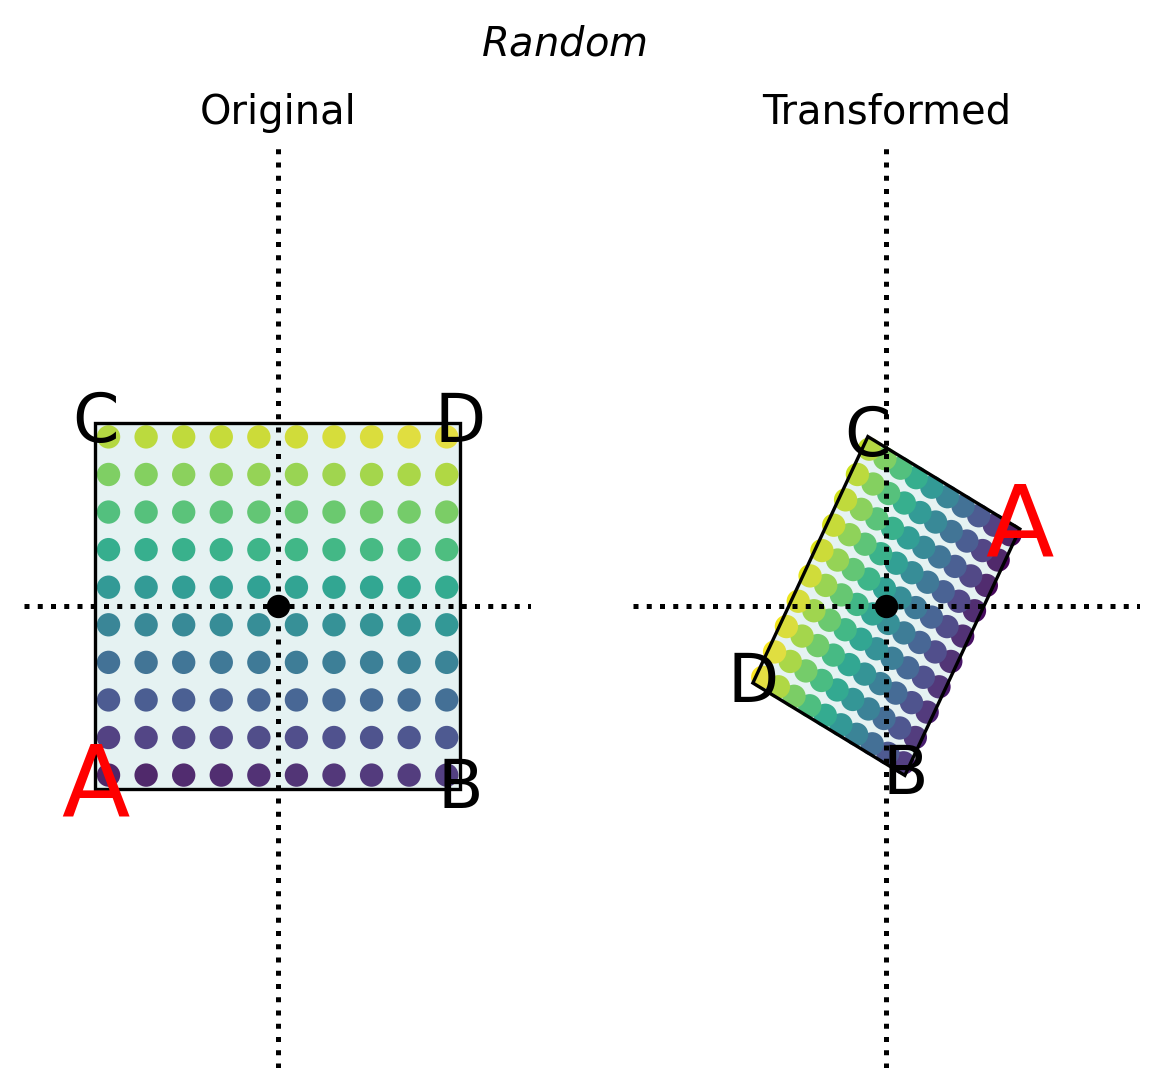

In [36]:
# random!
show_matrix_effect(np.random.uniform(-1, 1, (2, 2)), "Random")

---
---

## Matrix operations
There is an **algebra** of matrices; this is **linear algebra**. In particular, there is a concept of addition of matrices of *equal size*, which is simple elementwise addition:


<div class="alert alert-box alert-success">
    
$$  A + B = \begin{bmatrix}
a_{1,1} + b_{1,1} & a_{1,2} + b_{1,2} & \dots & a_{1,m} + b_{1,m} \\
a_{2,1} + b_{2,1} & a_{2,2} + b_{2,2} & \dots & a_{2,m} + b_{2,m} \\
\dots \\
a_{n,1} + b_{n,1} & a_{n,2} + b_{n,2} & \dots & a_{n,m} + b_{n,m} \\
\end{bmatrix}
$$
</div>

along with scalar multiplication $cA$, which multiplies each element by $c$.


<div class="alert alert-box alert-success">
 
$$  cA = \begin{bmatrix}
ca_{1,1}  & ca_{1,2} & \dots & ca_{1,m}  \\
ca_{2,1} & ca_{2,2}  & \dots & ca_{2,m} \\
\dots \\
ca_{n,1}  & ca_{n,2} & \dots & ca_{n,m} \\
\end{bmatrix}
$$
</div>

These correspond exactly to addition and scalar multiplication in NumPy.

In [37]:
a = np.arange(9).reshape(3, 3)
b = np.array([[1, 0, 1], 
              [-1, -1, -1], 
              [1, -1, 0]])

print_matrix("A", a)
print_matrix("B", b)
print_matrix("A+B", a + b)  # matrix addition
print_matrix("2A=A+A", a * 2)  # scalar multiplication
print_matrix("0.5A", a * 0.5)  # scalar multiplication
print_matrix("A-B = A+(-1)B", a - b)  # equal to (-1) * a + b

A 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
B 
 [[ 1  0  1]
 [-1 -1 -1]
 [ 1 -1  0]]
A+B 
 [[1 1 3]
 [2 3 4]
 [7 6 8]]
2A=A+A 
 [[ 0  2  4]
 [ 6  8 10]
 [12 14 16]]
0.5A 
 [[0.  0.5 1. ]
 [1.5 2.  2.5]
 [3.  3.5 4. ]]
A-B = A+(-1)B 
 [[-1  1  1]
 [ 4  5  6]
 [ 5  8  8]]


## Application to vectors
We can apply a matrix to a vector. We write it as a product $A\vec{x}$, to mean the matrix $A$ applied to the vector $\vec{x}$.  This is equivalent to applying the function $f(\vec{x})$, where $f$ is the corresponding function.

If $A$ is $\real^{n \times m}$, and $\vec{x}$ is $\real^m$, then this will map from an $m$ dimensional vector space to an $n$ dimensional vector space.

**All application of a matrix to a vector does is form a weighted sum of the elements of the vector**. This is a linear combination (equivalent to a "weighted sum") of the components.

In particular, we take each element of $\vec{x}, x_1, x_2, \dots, x_m$, multiply it with the corresponding *column* of $A$, and sum these columns together.

* Set $\vec{y}=[0,0,0,\dots]=0^n$ (the n-dimensional zero vector)
* For each column $1\leq i \leq m$ in $A$
    *    $\vec{y} = \vec{y} + x_iA_i$. Note that $x_iA_i$ is scalar times vector, and has $n$ elements. $A_i$ here means the $i$th column of $A$.


    1 2     1 
    3 4     2
    5 6
    7 8
                 
    = 1 * [1,3,5,7] + 2 * [2,4,6,8]
    = [1*1+2*2, 1*3+2*5, 1*4+2*6, 1*7+2*8], 
    = [5, 11, 17, 23]     
    
    We can use @ to form products of vectors and matrices in Numpy:
       


In [38]:
A = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
x = np.array([1, 2])

print_matrix("A", A)
print_matrix("\\bf x", x)
print_matrix("A @ x", A @ x)
print_matrix("A.dot(x)", A.dot(x))

A 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
\bf x 
 [[1 2]]
A @ x 
 [[ 5 11 17 23]]
A.dot(x) 
 [[ 5 11 17 23]]


In [39]:
# we'd never do this by hand
def apply_matrix_vector(A, x):
    y = np.zeros(A.shape[0])
    for i in range(A.shape[1]):
        y += x[i] * A[:, i]
    return y

print_matrix("A\\bf x", apply_matrix_vector(A, x))

A\bf x 
 [[ 5. 11. 17. 23.]]


In [40]:
x = np.array([1, 2, 3])
A = np.array([[1, -1, 1], [1, 0, 0], [0, 1, 1]])  # 3x3
print_matrix("x", x)  # note: written horizontally, but interpreted vertically!
print_matrix("A", A)
print_matrix("Ax", A @ x)  # linear transform -- output dimension == input dimension

x 
 [[1 2 3]]
A 
 [[ 1 -1  1]
 [ 1  0  0]
 [ 0  1  1]]
Ax 
 [[2 1 5]]


In [41]:
B = np.array([[2, -5, 5], [1, 0, 0]])  # 2x3 -- OK
print_matrix("B", B)
print_matrix("Bx", B @ x)

B 
 [[ 2 -5  5]
 [ 1  0  0]]
Bx 
 [[7 1]]


In [42]:
### shape error
C = np.array([[2, -5], [1, 0], [3, 3]])  # 3x2 -- not OK
print_matrix("C", C)
print_matrix("Cx", C @ x)

C 
 [[ 2 -5]
 [ 1  0]
 [ 3  3]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

### Matrix multiplication
Multiplication is the interesting matrix operation. Matrix multiplication defines the product $C=AB$, where $A,B,C$ are all matrices.

Matrix multiplication is defined such that if $A$ represents linear transform $f(\vec{x})$ and
$B$ represents linear transform $g(\vec{x})$, then $BA\vec{x} = g(f(\vec{x}))$.

**Multiplying two matrices is equivalent to composing the linear functions they represent, and it results in a matrix which has that affect.**

*Note that the composition of linear maps is read right to left. To apply the transformation $A$, **then** $B$, we form the product $BA$, and so on.*

### Multiplication algorithm
This gives rise to many important uses of matrices: for example, the product of a scaling matrix and a rotation matrix is a scale-and-rotate matrix. It also places some requirements on the matrices which form a valid product. Multiplication is *only* defined for two matrices $A, B$ if:
* $A$ is $p \times q$ and
* $B$ is $q \times r$.

This follows from the definition of multiplication: $A$ represents a map $\real^q \rightarrow \real^p$ and $B$ represents a map $\real^r \rightarrow \real^q$. The output of $A$ must match the dimension of the input of $B$, or the operation is undefined. 

Matrix multiplication is defined in a slightly surprising way, which is easiest to see in the form of an algorithm:
    


   
If $C=AB$ then $$C_{ij}=\sum_k a_{ik} b_{kj}$$

The element at $C_{ij}$ is the sum of the elementwise product of the $i$th row and the $j$th column, which will be the same size by the requirement above.


In [43]:
def matmul(a, b):
    p, q_a = a.shape
    q_b, r = b.shape
    # we can only multiply two matrices if A is p x q and B in q x r
    assert q_a == q_b
    # the result is a matrix of size p x r
    c = np.zeros((p, r))
    for i in range(p):
        for j in range(r):
            # Note that this can be seen as a simple *weighted sum*
            # the sum of the ith row of A weighted by the jth column of B
            c[i, j] = np.sum(a[i, :] * b[:, j])
    return c

In [44]:
a = np.array([[1, 2, -3]])
b = np.array([[1, -1, 1], 
              [2, -2, 2], 
              [3, -3, 3]])

print_matrix("{\\bf A}", a)
print_matrix("{\\bf B}", b)
c = matmul(a,b)
print_matrix("{\\bf A}B", c)

{\bf A} 
 [[ 1  2 -3]]
{\bf B} 
 [[ 1 -1  1]
 [ 2 -2  2]
 [ 3 -3  3]]
{\bf A}B 
 [[-4.  4. -4.]]


Matrix multiplication is of course built in to NumPy, and much more efficient than this algorthim. Matrix multiplication is applied by `np.dot(a,b)` or by the syntax `a @ b`

We'll use `a @ b` as the standard syntax for matrix multiplication.

In [45]:
# verify that this is the same as the built in matrix multiply
c_numpy = np.dot(a, b)
print_matrix("C_{\\text numpy}", c_numpy)
print(np.allclose(c, c_numpy))

c_at = a @ b 
print_matrix("C_{\\text a @ b}", a @ b)
print(np.allclose(c_at, c))

C_{\text numpy} 
 [[-4  4 -4]]
True
C_{\text a @ b} 
 [[-4  4 -4]]
True


### Time complexity of multiplication
Matrix multiplication has, in the general case, of time complexity $O(pqr)$, or for multiplying two square matrices $O(n^3)$. This is apparent from the three nested loops above. However, there are many special forms of matrices for which this complexity can be reduced, such as diagonal, triangular, sparse and banded matrices. We will we see these **special forms** later.

There are some accelerated algorithms for general multiplication. The time complexity of all of them is $>O(N^2)$ but $<O(N^3)$. Most accelerated algorithms are impractical for all but the largest matrices because they have enormous constant overhead.


### Apply matrices to vectors
The same algorithm for multiplying two matrices applies to multiplying a matrix by a vector **if we assume a $m$ dimensional vector $\vec{x} \in \real^m$ is represented as a $m \times 1$ column vector**:

$$
\begin{bmatrix}
x_1\\
x_2\\
\dots\\
x_m\\
\end{bmatrix}
$$

Then the product $Ax$ is application of the linear map defined by $A$ to vector $\vec{x}$. $A$ must be of dimension $n\times m$ for this operation to be defined. If $A$ is $m \times m$ then it is a **linear transform** (as we defined it above), and the result is another vector of the same dimension.

Note: this is a slight abuse of notation. $\vec{x}$ is a vector, not a matrix, and it is neither a column vector nor a row vector -- it's just an element of a vector space. However, it's convenient to pretend it works like a $m \times 1$ matrix.

In [46]:
print_matrix("A", A)
print_matrix("x", x)
print_matrix("Ax", A @ x)
# force to a 2D array of m x 1 size
print_matrix("Ax", A @ x.reshape(-1, 1))
# note this will still be a 2D array in NumPy
# and will appear differently when printed. However, it
# has the same *semantics* as a 1D array

A 
 [[ 1 -1  1]
 [ 1  0  0]
 [ 0  1  1]]
x 
 [[1 2 3]]
Ax 
 [[2 1 5]]
Ax 
 [[2]
 [1]
 [5]]


### Transposition
The **transpose** of a matrix $A$ is written $A^T$ and has the same elements, but with the rows and columns exchanged. Many matrix algorithms use transpose in computations.

NumPy uses the `A.T` syntax to transpose any array by reversing its stride array, which corresponds to the mathematical transpose for matrices.


In [47]:
### Transpose
A = np.array([[2, -5], [1, 0], [3, 3]])
print_matrix("A", A)
print_matrix("A^T", A.T)

A 
 [[ 2 -5]
 [ 1  0]
 [ 3  3]]
A^T 
 [[ 2  1  3]
 [-5  0  3]]


### Column and row vectors
The transpose of a column vector $$\vec{x}=
\begin{bmatrix}
x_1\\
x_2\\
\dots\\
x_n\\
\end{bmatrix}
$$ is a row vector  $$\vec{x}^T=
\begin{bmatrix}
x_1 &
x_2 & 
\dots & 
x_n
\end{bmatrix}
$$

Note that from our definition of matrix multiplication, the product of a Mx1 with a 1xN vector is an $M \times N$ matrix. This is the **outer product** of two vectors, every possible combination of their elements:

$$\vec{x} \otimes \vec{y} = \vec{x}^T \vec{y}$$

and the product of a 1xN with an Nx1 vector is a 1x1 matrix; a scalar. This is exactly the **inner product** of two vectors:

$$\vec{x} \bullet \vec{y} = \vec{x}\vec{y^T} ,$$
and is only defined for vectors $\vec{x}, \vec{y}$ of the same length.

[again, we abuse notation to make it meaningful to "transpose" a vector; this is assuming we treat it as a column vector]

In [48]:
x = np.array([[1,2,3]])
y = np.array([[4,5,6]])

print_matrix("{\\bf x}", x)
print_matrix("{\\bf y}", y)

{\bf x} 
 [[1 2 3]]
{\bf y} 
 [[4 5 6]]


In [49]:
print_matrix("{\\bf x} \otimes {\\bf y}", np.outer(x,y))
print_matrix("{\\bf x}^T{\\bf y}", x.T @ y)

print_matrix("{\\bf x} \\bullet {\\bf y}", np.inner(x,y))
print_matrix("{\\bf x}{\\bf y}^T", x @ y.T)

{\bf x} \otimes {\bf y} 
 [[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]
{\bf x}^T{\bf y} 
 [[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]
{\bf x} \bullet {\bf y} 
 [[32]]
{\bf x}{\bf y}^T 
 [[32]]


## Composed maps 

There is a very important property of matrices. If $A$ represents $f(x)$ and $B$ represents $g(x)$, then the product $BA$ represents $g(f(x))$. **Multiplication is composition.** Note carefully the order of operations. $BA\vec{x} = B(A\vec{x})$ means do $A$ to $\vec{x}$, then do $B$ to the result.

We can visually verify that composition of matrices by multiplication is the composition of their effects. For example, lets define a nonuniform scaling and a rotation matrix:

In [50]:
## Rotation
d30 = np.radians(30)
cs = np.cos(d30)
ss = np.sin(d30)
rot30 = np.array([[cs, ss], [-ss, cs]])

## Scaling
scale_x = np.array([[1,0], [0, 0.5]])

 
 [[ 0.87  0.5 ]
 [-0.5   0.87]]


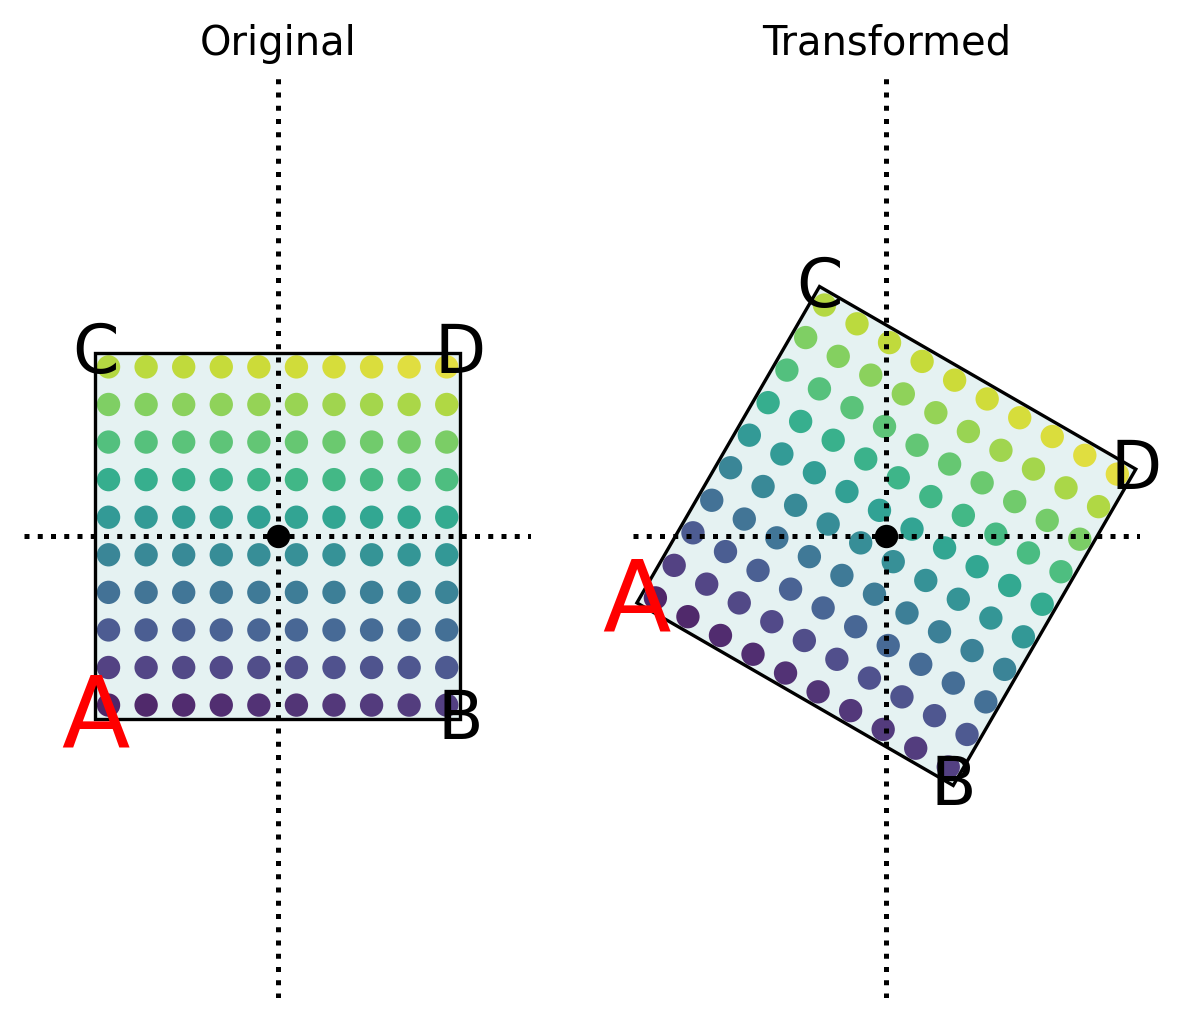

In [51]:
show_matrix_effect(rot30)

 
 [[1.  0. ]
 [0.  0.5]]


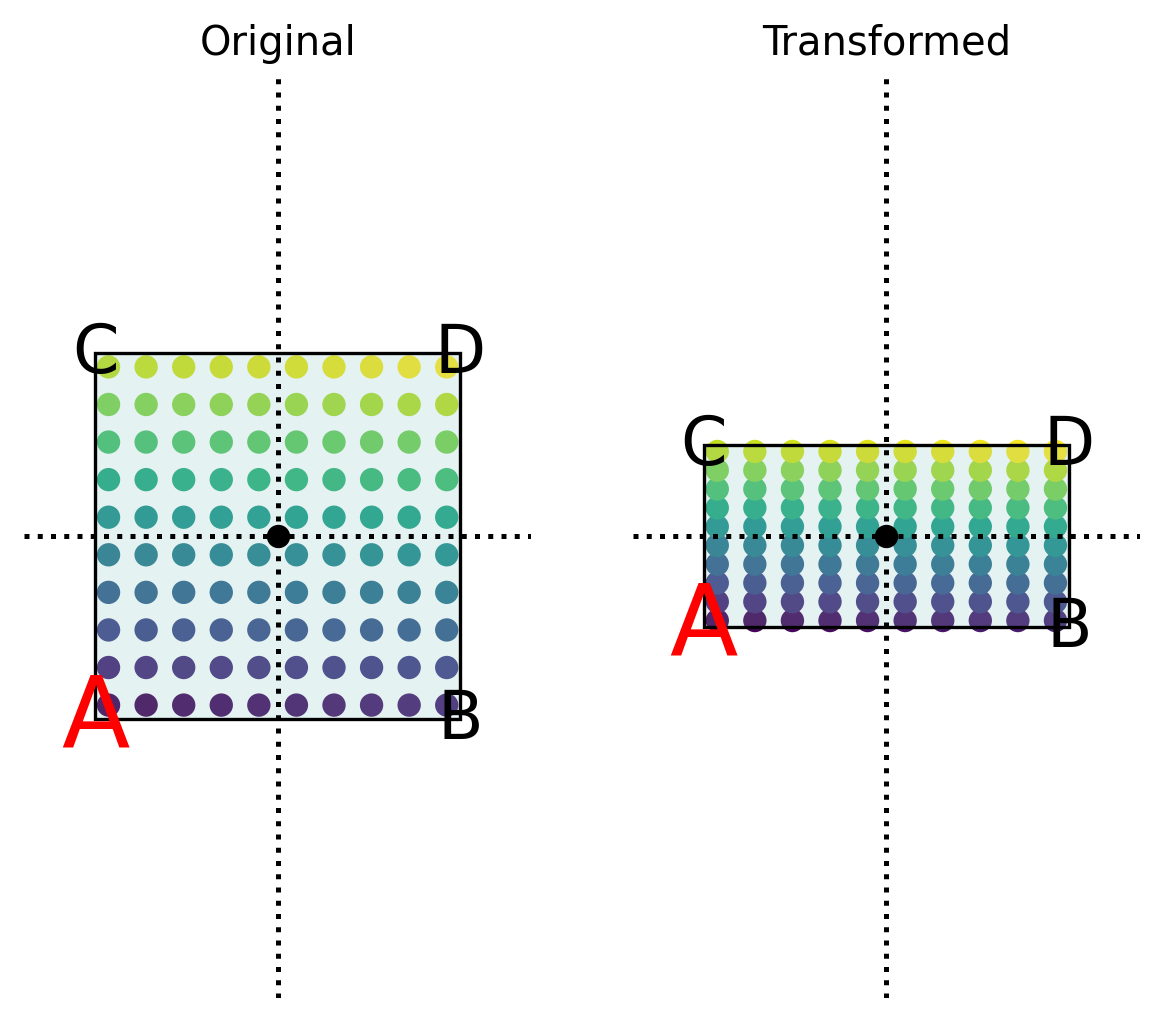

In [52]:
show_matrix_effect(scale_x)

[[ 0.8660254  0.5      ]
 [-0.25       0.4330127]]
Rotate then scale 
 [[ 0.87  0.5 ]
 [-0.25  0.43]]


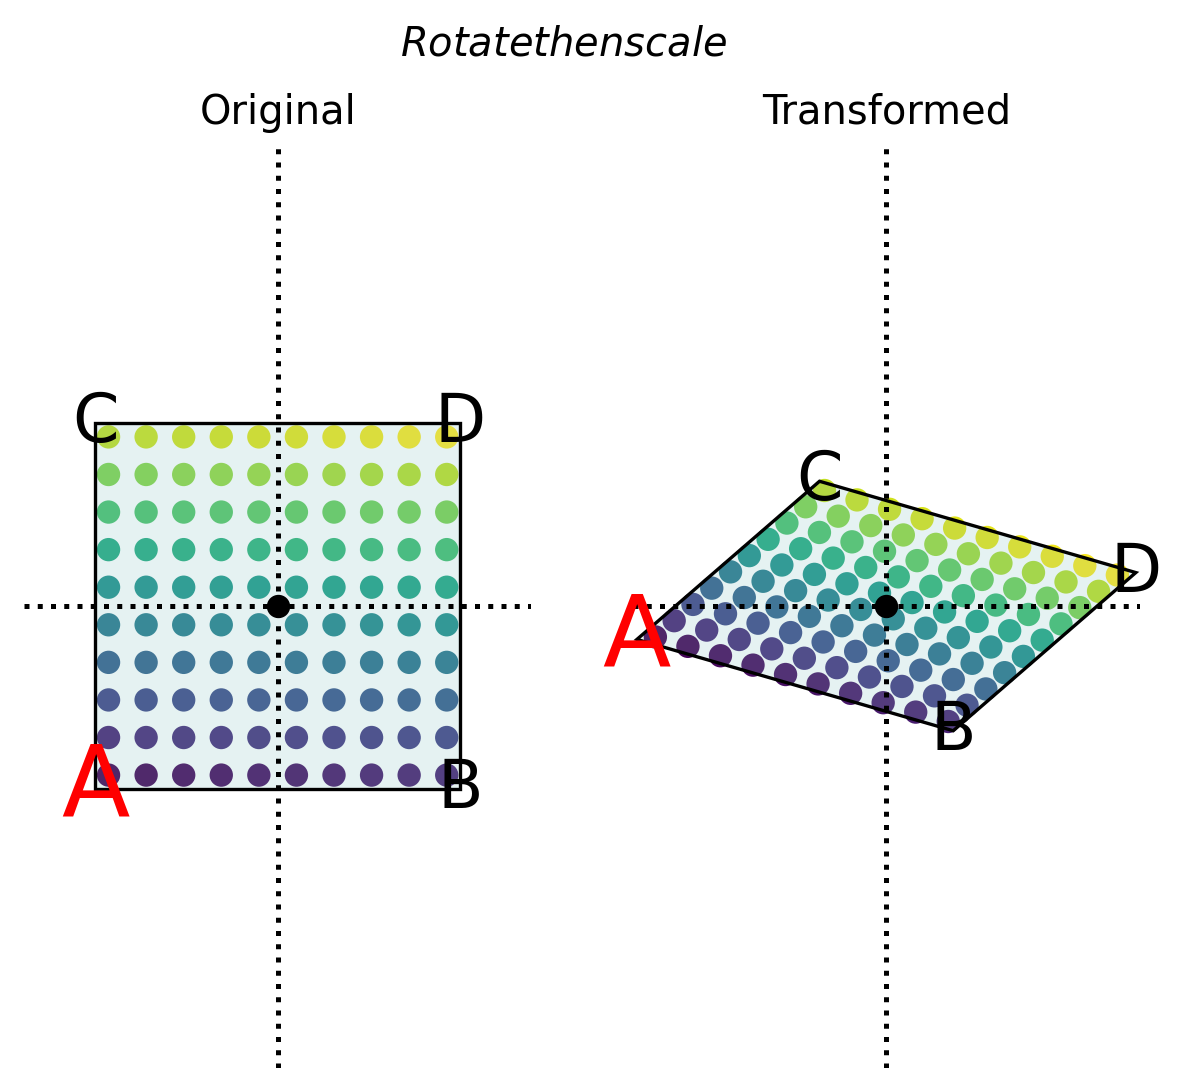

In [53]:
A = scale_x @ rot30 # product of scale and rotate
print(A)
show_matrix_effect(A, "Rotate then scale")   # rotate, then scale

[[ 0.8660254  0.25     ]
 [-0.5        0.4330127]]
Scale then rotate 
 [[ 0.87  0.25]
 [-0.5   0.43]]


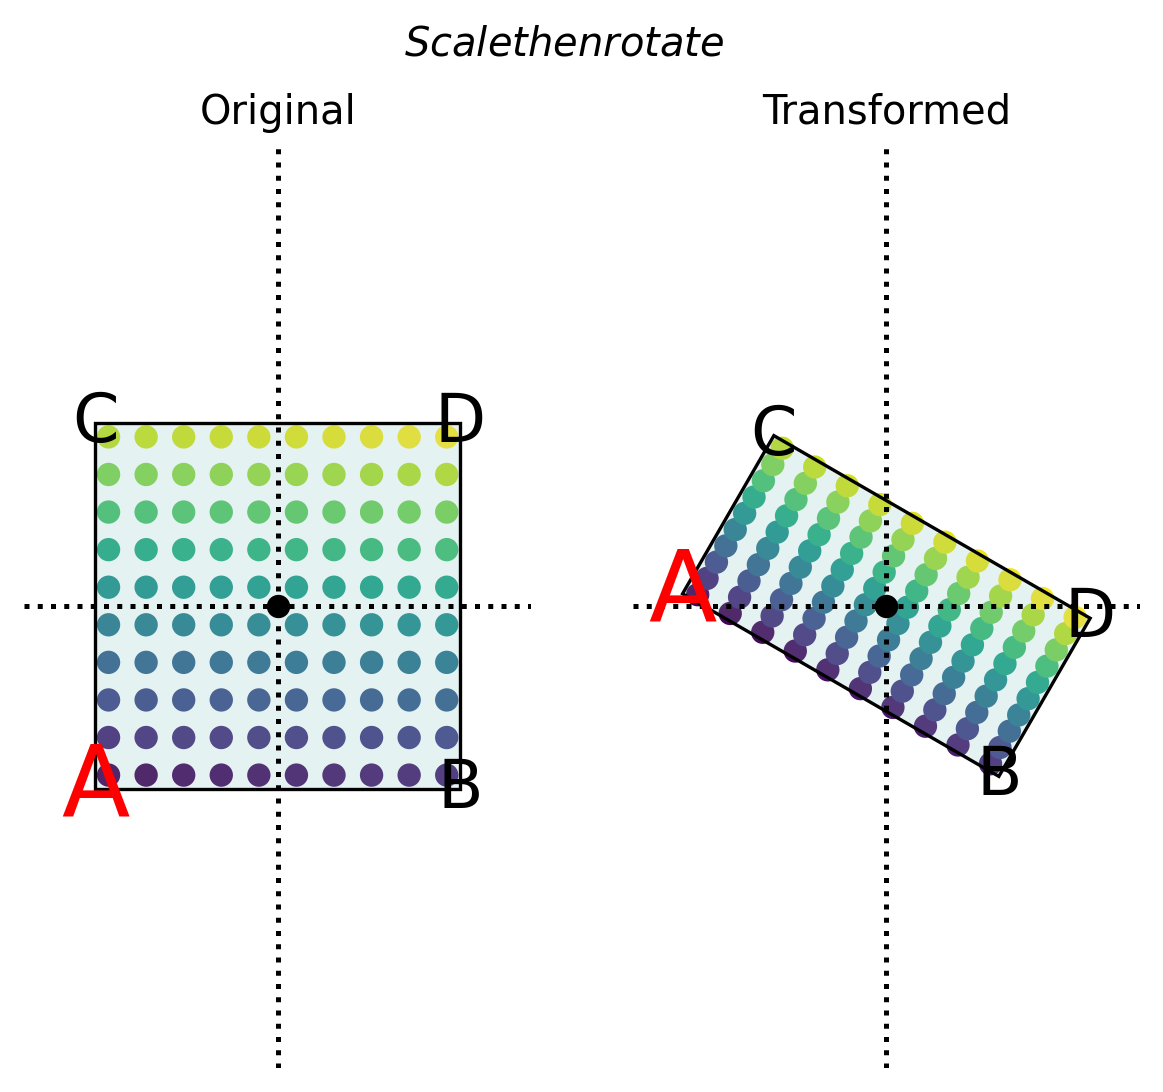

In [54]:
B = rot30 @ scale_x
print(B)
show_matrix_effect(B, "Scale then rotate")  # scale, then rotate
# note: Not the same!

### Concatenation of transforms
Many software operations take advantage of the definition of matrix multiplication as the composition of linear maps. In a graphics processing pipeline, for example, all of the operations to position, scale and orient visible objects are represented as matrix transforms. Multiple operations can be combined into *one single matrix operation*.

The desktop UI environment you are uses linear transforms to represent the transformation from data coordinates to screen coordinates. Because multiplication composes transforms, only a single matrix for each object needs to be kept around. (actually for 3D graphics, at least two matrices are kept: one to map 3D -> 3D (the *modelview matrix*) and one to map 3D -> 2D (the *projection matrix*)).

Rotating an object by 90 degrees computes product of the current view matrix with a 90 degree rotation matrix, which is then stored in place of the previous view matrix. This means that all rendering just needs to apply to relevant matrix to the geometry data to get the pixel coordinates to perform the rendering.

--- 


### Commutativity
The order of multiplication is important. Matrix multiplication does **not** commute; in general:

$$AB \neq BA$$

This should be obvious from the fact that multiplication is only defined for matrices of dimension $p \times q$ and $q \times r$; unless $p=q=r$ then the multiplication is not even *defined* if the operands are switched, since it would involve a $q \times r$ matrix by a $p \times q$ one!

Even if two matrices are compatible in dimension when permuted (i.e. if they are square matrices, so $p=q=r$), multiplication still does not generally commute and it matters which order operations are applied in.

#### Transpose order switching

There is a very important identity which is used frequently in rearranging expressions to make computation feasible. That is:

$$(AB)^T = B^TA^T$$
    
Remember that matrix multiplication doesn't commute, so $AB \neq BA$ in general (though it can be true in some special cases), so this is the only way to algebraically reorder general matrix multiplication expressions (side note: inversion has the same effect, but only works on non-singular matrices). This lets us rearrange the order of matrix multiplies to "put matrices in the right place".

It is also true that $$(A+B)^T = A^T+B^T$$ but this is less often useful.

### Left-multiply and right-multiply
Because of the noncommutativity of multiplication of matrices, there are actually two different matrix multiplication operations: **left multiplication** and **right multiplication**.

$B$ left-multiply $A$ is $AB$; $B$ right-multiply $A$ is $BA$. This becomes important if we have to multiply out a longer expression:

$$B\vec{x}+\vec{y}\\
\text{left multiply by A}\quad =A[B\vec{x}+\vec{y}] = AB\vec{x} + A\vec{y}\\
\text{right multiply by A}\quad =[B\vec{x}+\vec{y}]A = B\vec{x}A + \vec{y}A\\
$$


----


## An example matrix for measuring spread: covariance matrices

As well as the **mean vector** we saw earlier, we can also generalise the idea of **variance**, which measures the spread of a dataset, to the multidimensional case. Variance (in the 1D case) is the sum of squared differences of each element from the mean of the vector:
$$\sigma^2 =  \frac{1}{N-1} \sum_{i=0}^{N-1} (x_i - \mu_i)^2$$

This is a measure of how "spread out" a vector of values $\vec{x}$ is. The **standard deviation** $\sigma$ is the square root of the **variance** and is more often used because it is in the same units as the elements of $\vec{x}$.

In the multidimensional case, to get a useful measure of spread of a $N \times d$ data matrix  $X$ ($N$ $d$-dimensional vectors) we need to compute the *covariance* of every dimension with every other dimension. This is the average squared difference of each column of data from the average of every column. This forms a 2D array $\Sigma$, which has entries in element $i,j$:

$$\Sigma_{ij} = \frac{1}{N-1} \sum_{k=1}^{N} (X_{ki}-\mu_i)(X_{kj}-\mu_j) $$

As we will discuss shortly, this is a *special form* of matrix: it is square, symmetric and positive semi-definite.


In [55]:
x = np.random.normal(0,1,(500, 5))

mu = np.mean(x, axis=0)
sigma_cross = ((x - mu).T @ (x - mu)) / (x.shape[0]-1)
np.set_printoptions(suppress=True, precision=2)
print_matrix("\Sigma_{\\text{cross}}", sigma_cross)

\Sigma_{\text{cross}} 
 [[ 1.05  0.09  0.01 -0.   -0.07]
 [ 0.09  0.94  0.01 -0.02 -0.  ]
 [ 0.01  0.01  0.98 -0.03  0.1 ]
 [-0.   -0.02 -0.03  0.93 -0.02]
 [-0.07 -0.    0.1  -0.02  1.1 ]]


It is also directly provided by NumPy as `np.cov(x)`.

In [56]:
# verify it is close to the function provided by NumPy
sigma_np = np.cov(x, rowvar=False)
print_matrix("\Sigma_{\\text{numpy}}", 
             sigma_np)

\Sigma_{\text{numpy}} 
 [[ 1.05  0.09  0.01 -0.   -0.07]
 [ 0.09  0.94  0.01 -0.02 -0.  ]
 [ 0.01  0.01  0.98 -0.03  0.1 ]
 [-0.   -0.02 -0.03  0.93 -0.02]
 [-0.07 -0.    0.1  -0.02  1.1 ]]


### Covariance ellipses
This matrix captures the spread of data, including any **correlations** between dimensions. It can be seen as capturing an **ellipse** that represents a dataset.  The **mean vector** represents the centre of the ellipse, and the **covariance matrix** represent the shape of the ellipse. This ellipse is often called the **error ellipse** and is a very useful summary of high-dimensional data.

The covariance matrix represents a (inverse) transform of a unit sphere to an ellipse covering the data. Sphere->ellipse is equivalent to square->parallelotope and so can be precisely represented as a matrix transform.

In [57]:
# These are helper functions. You do not need to undersatnd these in detail. 
from matplotlib.patches import Ellipse

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:, order]

def cov_ellipse(ax, x, nstd=1, **kwargs):
    cov = np.cov(x.T)
    mu = np.mean(x, axis=0)
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    w, h = 2 * nstd * np.sqrt(vals)
    ell = Ellipse(xy=(mu[0], mu[1]), width=w, height=h, angle=theta, **kwargs)

    ax.add_artist(ell)
    return mu,cov

\mu 
 [[-0.01 -0.05]]
\Sigma 
 [[ 0.79 -0.79]
 [-0.79  1.19]]


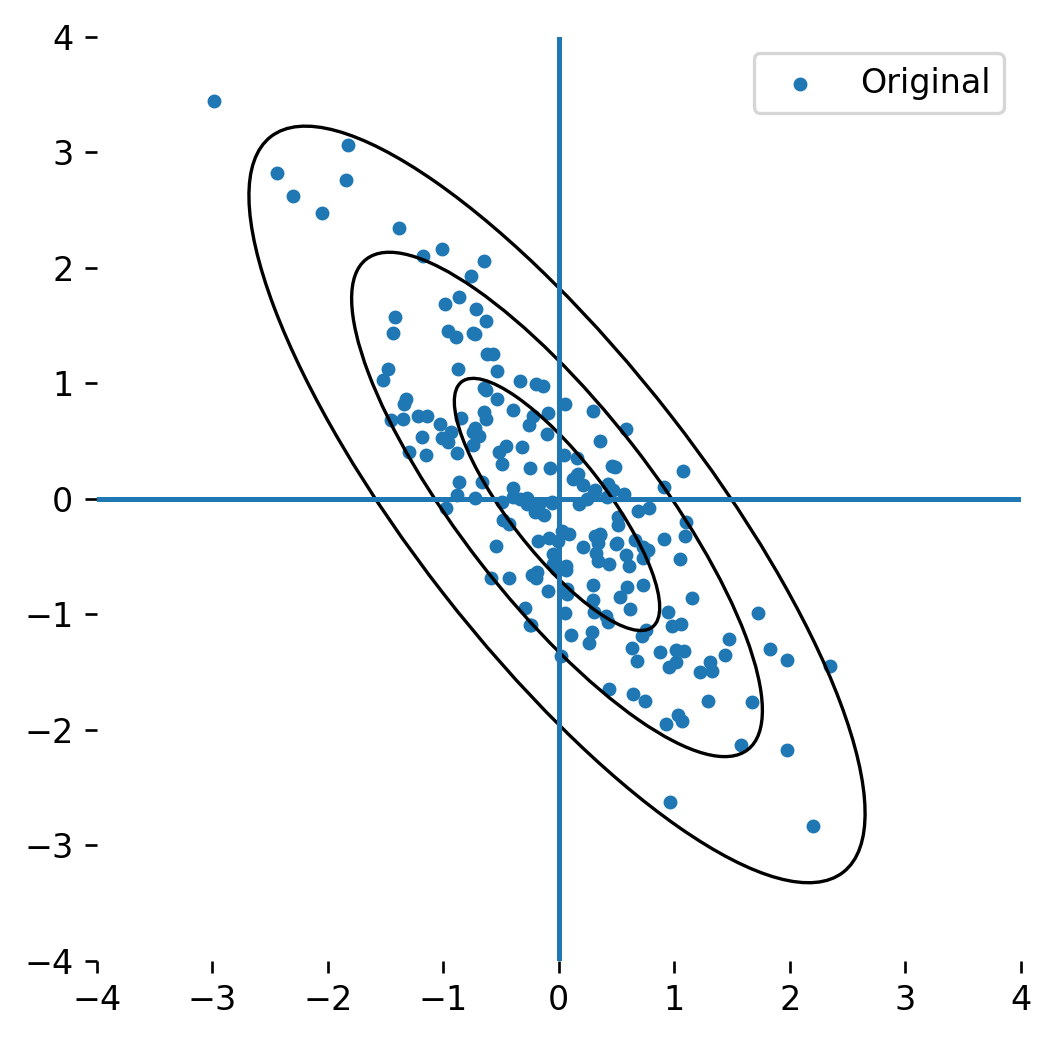

In [58]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x =  np.random.normal(0,1,(200,2)) @ np.array([[0.1, 0.5], [-0.9, 1.0]])

ax.scatter(x[:,0], x[:,1], c='C0', label="Original", s=10)
cov_ellipse(ax, x[:,0:2], 1, facecolor='none', edgecolor='k')
cov_ellipse(ax, x[:,0:2], 2, facecolor='none', edgecolor='k')
mu, cov = cov_ellipse(ax, x[:,0:2], 3, facecolor='none', edgecolor='k')

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.axhline(0)
ax.axvline(0)
ax.set_frame_on(False)
ax.set_aspect(1.0)
ax.legend()

print_matrix("\mu",mu)
print_matrix("\Sigma",cov)

The mean vector and covariance matrix capture the idea of "centre" and "spread" of a collection of points in a vector space, the way the mean and the standard deviation do for real numbers.

---

# Anatomy of a matrix
The **diagonal** entries of a matrix ($A_{ii}$) are important "landmarks" in the structure of a matrix. Matrix elements are often referred to as being "diagonal" or "off-diagonal" terms. 





Matrices which are all zero except for a single diagonal entry are called... *diagonal* matrices.
They represent a transformation that is an independent scaling of each dimension. Such matrices transform cubes to cuboids (i.e. all angles remain unchanged, and no rotation occurs).

$$\begin{bmatrix}
1 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 3 \\
\end{bmatrix}$$

`np.diag(x)` will return a diagonal matrix for a given vector `x`

In [59]:
print_matrix("\\text{diag}(x)", np.diag([1,2,3,3,2,1]))

\text{diag}(x) 
 [[1 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 1]]



The **anti-diagonal** is the set of elements $A_{i[N-i]}$ for an $NxN$ matrix, for example a 3x3 binary anti-diagonal matrix:

$$
\begin{bmatrix}
 0 & 0 & 1 \\
 0 & 1 & 0 \\
 1 & 0 & 0 \\
\end{bmatrix}
$$


In [60]:
# an anti-diagonal array is the diagonal of the flipped array
print_matrix("\\text{anti-diagonal}", np.fliplr(np.diag([1,2,3])))

\text{anti-diagonal} 
 [[0 0 1]
 [0 2 0]
 [3 0 0]]



## Special matrix forms
There are *many* different special types of matrices, with different properties (for example, matrices that permute dimensions, or matrices that represent *invertible* transformations). 

[Wikipedia's enormous list of matrices](https://en.wikipedia.org/wiki/List_of_matrices) gives a fairly comprehensive overview. We will only deal with a few special kinds of matrix in IDSS(M). In particular, we will deal with **real matrices** only, and primarily with **real square matrices**.


### Identity
The identity matrix is denoted $I$ and is a $n$ square matrix, where all values are zero except 1 along the diagonal:
$$\begin{bmatrix}
1 & 0 & 0 & \dots & 0 \\
0 & 1 & 0 & \dots & 0 \\
0 & 0 & 1 & \dots & 0 \\
\dots \\
0 & 0 & 0 & \dots & 1\\
\end{bmatrix}$$

The identity matrx *has no effect* when multiplied by another matrix or vector. (Obviously, it must be dimension compatible to be multiplied at all)

$IA=A=AI$ and $I{\bf x}={\bf x}$.

It is generated by `np.eye(n)`

In [61]:
print_matrix("I", np.eye(3))

I 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [62]:
# your identity never changes anything
print_matrix("Ix", np.eye(3) @ np.array([4,5,6]) )

Ix 
 [[4. 5. 6.]]


In [63]:
print_matrix("AI", np.array([[1,2,3],[4,5,6],[7,8,9]]) @ 
             np.eye(3))
print_matrix("IA", np.eye(3) @ np.array([[1,2,3],[4,5,6],[7,8,9]]) )

AI 
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
IA 
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


Any scalar multiple of the identity corresponds to a function which uniformly scales vectors:
$$(cI){\bf x} = c{\bf x}$$

In [64]:
a = 0.5
x = np.array([4,5,6]) 
aI = np.eye(3) * a
print("c=",a)
print_matrix("cI", aI)
print_matrix("(cI){\\bf x}\n", aI @ x)

# the same thing:
print_matrix("c{\\bf x}\n",a*x)

c= 0.5
cI 
 [[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.5]]
(cI){\bf x}
 
 [[2.  2.5 3. ]]
c{\bf x}
 
 [[2.  2.5 3. ]]


### Zero
The zero matrix is all zeros, and is defined for any matrix size $m\times n$. It is written as $0$. Multiplying any vector or matrix by the zero matrix results in a result consisting of all zeros. The 0 matrix maps all vectors onto the zero vector (the origin).

In [65]:
z = np.zeros((4,4))
print(z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [66]:
x = np.array([1,2,3,4])
y = np.array([[1,-1,1], [1,1,-1], [1,1,1], [-1,-1,-1]])
print_matrix("x", x)
print_matrix("y", y)
print_matrix("0x", z @ x)
print()
print_matrix("0y", z @ y)

x 
 [[1 2 3 4]]
y 
 [[ 1 -1  1]
 [ 1  1 -1]
 [ 1  1  1]
 [-1 -1 -1]]
0x 
 [[0. 0. 0. 0.]]

0y 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


## Square
A matrix is square if it has size $n\times n$. Square matrices are important, because they apply transformations *within* a vector space; a mapping from $n$ dimensional space to $n$ dimensional space; a map from $\real^n \rightarrow \real^n$. 

They represent functions mapping one domain to itself. Square matrices are the only ones that:
* have an inverse 
* have determinants
* have an eigendecomposition

which are all ideas we will see in the following unit.

## Triangular
A square matrix is triangular if it has non-zero elements only above (**upper triangular**) or below the diagonal (**lower triangular**), *inclusive of the diagonal*.

**Upper triangular**
$$\begin{bmatrix}
1 & 2 & 3 & 4 \\
0 & 5 & 6 & 7 \\
0 & 0 & 8 & 9 \\
0 & 0 & 0 & 10 \\
\end{bmatrix}
$$


**Lower triangular**
$$\begin{bmatrix}
1 & 0 & 0 & 0 \\
2 & 3 & 0 & 0 \\
4 & 5 & 6 & 0 \\
7 & 8 & 9 & 10 \\
\end{bmatrix}
$$


These represent particularly simple to solve sets of simultaneous equations. For example, the lower triangular matrix above can be seen as the system of equations:

$$x_1 = y_1\\
2x_1 + 3x_2 = y_2\\ 
4x_1 + 5x_2 + 6x_3 = y_3\\ 
7x_1 + 8x_2 + 9x_3 + 10x_4 = y_4\\ 
$$

which, for a given $y_1, y_2, y_3, y_4$ is trivial to solve by substitution.

In [67]:
# tri generates an all ones lower triangular matrix
upper = np.tri(4) 
print_matrix("T_u", upper)

# transpose changes a lower triangular to an upper triangular
lower = np.tri(4).T 
print_matrix("T_l", lower)

T_u 
 [[1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]]
T_l 
 [[1. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]


---

## Resources

* [**3blue1brown Linear Algebra series**](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)  (**strongly recommended**)

* [**Introduction to applied linear algebra**](http://stanford.edu/~boyd/vmls/vmls.pdf ) *by S. Boyd and L. Vandenberghe* 
 
 
## Beyond this course
* **Linear Algebra Done Right** *by Sheldon Axler* (excellent introduction to the "pure math" side of linear algebra) ISBN-13: 978-0387982588

* **Coding the Matrix: Linear Algebra through Applications to Computer Science** *by Philip N Klein* (top quality textbook on how linear algebra is implemented, all in Python) ISBN-13: 978-0615880990

* **Linear Algebra and Learning from Data** *Gilbert Strang*, ISBN-13: 978-069219638-0, explains many detailed aspects of linear algebra and how they relate to data science.

## Way beyond this course
* [**The Matrix Cookbook**](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) *by Kaare Brandt Petersen and Michael Syskind Pedersen*. If you need to do a tricky calculation with matrices, this book will probably tell you how to do it.